# CS 363M Machine Learning Project

## Coders/Writers:
-   Carlos Olvera (cao2546)
-   Ariel Zolton
-   Patricio Hernandez
-   Akshay Pradeep (ap55352)


## Background Information

In this project, we want to predict the milk yield of dairy cows based on various characteristics such as age, weight, feed type, vaccination status, weather conditions, and other attributes. This is an interesting problem because it could be used to optimize feeding and grazing strategies, improve resource planning and management, forecast financial outcomes, monitor animal health status, and enable data-driven decisions for more sustainable farm operations.

To do this, we are using data from a dataset containing 250,000 dairy cow records. Our dataset includes information on each animal's biological characteristics, nutritional factors, health status, and environmental conditions during the recorded milking period.

We want to use this data to predict the milk yield (in liters) for each cow. We will use information such as the cow's age, weight, feed intake, water consumption, weather conditions, and other attributes to predict this. This ML problem is especially interesting, as the accurate prediction of milk yield can significantly impact farm productivity and animal welfare. The challenge involves working with a large-scale real-world dataset and building models that generalize well to unseen data, avoiding overfitting while capturing the complex relationships between various factors and milk production.

## Preparations:

In [118]:
### Import packages

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import seaborn as sns
import sklearn as sk

## Cleaning

In [120]:
# Load the training data
train_data = pd.read_csv('cattle_data_train.csv')

# Print shape to see dimensions
print("Shape: ", train_data.shape)

# Display first few rows
train_data.head()

Shape:  (210000, 36)


,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis,Milk_Yield_L
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,0,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1,12.192634
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,0,17.16,4.0,12,2023-10-31,FARM_0219,NaN,0,14.717031
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,1,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0,14.006142
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0,24.324325
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,1,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1,12.023074


One notable feature of this dataset is the diversity of variables captured - we have biological factors (age, weight, parity), nutritional information (feed type, feed quantity, water intake), behavioral metrics (walking distance, grazing duration, rumination time), environmental conditions (temperature, humidity, climate zone), and health indicators (vaccination status, body condition score, mastitis presence). Looking at the data structure, we can see that some variables are categorical (like breed, management system, lactation stage) while others are continuous numerical measurements.

Another important observation is that the dataset includes the Previous_Week_Avg_Yield feature, which represents the average milk yield from the previous week. This temporal information could be highly predictive of current milk yield, as milk production tends to follow patterns over time. We'll need to carefully handle both categorical and numerical features, check for missing values or inconsistencies, and explore correlations between variables to build a robust predictive model that can accurately forecast milk yield for dairy cows across different farms and conditions.

In [121]:
# Load the training data
train_data = pd.read_csv("cattle_data_train.csv")

# Print shape to see dimensions
print("Shape of the data: ", train_data.shape)

# Get number of rows and columns
num_rows = train_data.shape[0]
num_cols = train_data.shape[1]

# Figure out some basic statistics
num_cows = train_data['Cattle_ID'].nunique()
print("This data represents", num_cows, "unique cows")

# Calculate average milk yield
avg_milk_yield = train_data['Milk_Yield_L'].mean()
print("This means there was an average", round(avg_milk_yield, 2), "liters of milk per cow")


Shape of the data:  (210000, 36)
This data represents 209966 unique cows
This means there was an average 15.59 liters of milk per cow


Now we want to take a more in-depth look at all of our features and use both logic and analytical methods to identify features which are not useful and then remove them as part of our feature engineering step. For this purpose, it is crucially important to understand what exactly the 28 given features are exactly.

Here are the features and their meanings:

<details>
<summary>Features/Attributes</summary>

**Identification**
- **Cattle_ID**: Unique identifier for each animal
- **Farm_ID**: Unique identifier for the farm
- **Date**: Date of the record

**Biological Characteristics**
- **Breed**: Breed of the animal
- **Age_Months**: Age of the cow in months
- **Weight_kg**: Weight of the cow in kilograms
- **Parity**: Number of times the cow has birthed a calf
- **Lactation_Stage**: Stage of lactation (Early, Mid, Late)
- **Days_in_Milk**: Days since the cow started lactation
- **Body_Condition_Score**: Cow's body condition on a numeric scale

**Nutritional Factors**
- **Feed_Type**: Type of feed provided
- **Feed_Quantity_kg**: Amount of feed in kilograms
- **Feed_Quantity_lb**: Amount of feed in pounds
- **Feeding_Frequency**: Number of feedings per day
- **Water_Intake_L**: Daily water consumption in liters

**Activity Metrics**
- **Walking_Distance_km**: Distance walked per day in kilometers
- **Grazing_Duration_hrs**: Hours spent grazing per day
- **Rumination_Time_hrs**: Hours spent chewing cud per day
- **Resting_Hours**: Hours spent resting per day

**Environmental Factors**
- **Climate_Zone**: Climate region of the farm
- **Ambient_Temperature_C**: Environmental temperature in °C
- **Humidity_percent**: Relative humidity percentage

**Farm Management**
- **Management_System**: Type of farm management system used at the farm
- **Housing_Score**: Quality or condition score of housing/facility
- **Milking_Interval_hrs**: Hours between milking sessions

**Health Indicators**
- **[Disease]_Vaccine**: Indicates whether the cow has received vaccination for a specific disease
- **Mastitis**: Presence or absence of mastitis (inflammation of the cow's udder tissue)

**Historical Data**
- **Previous_Week_Avg_Yield**: Average milk yield last week in liters

**Target Variable**
- **Milk_Yield_L**: The total volume of milk produced by the cow in liters during the recorded milking period; this is the target variable to be predicted.

# Check for missing

In [122]:
# Check for missing values
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing = train_data.isnull().sum()
missing_pct = (train_data.isnull().sum() / len(train_data)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

MISSING VALUES ANALYSIS
                  Missing_Count  Percentage
Feed_Quantity_kg          10481    4.990952
Feed_Quantity_lb          10481    4.990952
Housing_Score              6279    2.990000


# Seaparate Features

In [123]:
# Identify different types of features
print("\n" + "="*50)
print("FEATURE TYPES")
print("="*50)

# Categorical features
categorical_features = [
    'Breed', 'Climate_Zone', 'Management_System', 'Lactation_Stage',
    'Feed_Type', 'Health_Score_Quality', 'Milking_Reserve_Hrs'
]

# Binary features (0 or 1)
binary_features = ['BVD_Vaccine', 'Rabies_Vaccine', 'Mastitis']

# Numerical features
numerical_features = [
    'Age_Months', 'Weight_kg', 'Parity', 'Days_in_Milk',
    'Feed_Quantity_kg', 'Feeding_Frequency', 'Feeding_Density_kg',
    'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs',
    'Rumination_Time_hrs', 'Ambient_Temperature_C', 'Humidity_Percentage',
    'Body_Condition_Score', 'Milking_Interval_hrs', 'Previous_Week_Avg_Yield'
]

print(f"Categorical features: {len(categorical_features)}")
print(f"Binary features: {len(binary_features)}")
print(f"Numerical features: {len(numerical_features)}")


FEATURE TYPES
Categorical features: 7
Binary features: 3
Numerical features: 16


# Anaylze


PREVIOUS WEEK AVG YIELD ANALYSIS
Missing values: 0
Mean: 8.75
Std: 5.90
Min: 0.00
Max: 38.67

Correlation with Milk_Yield_L: 0.090


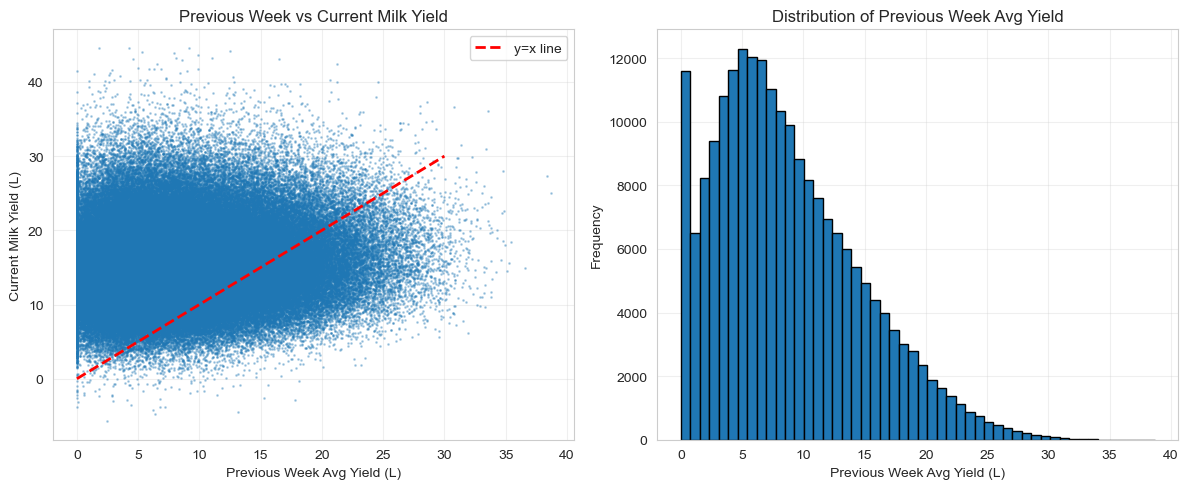

In [124]:
# Analyze Previous Week Avg Yield
print("\n" + "="*50)
print("PREVIOUS WEEK AVG YIELD ANALYSIS")
print("="*50)

print(f"Missing values: {train_data['Previous_Week_Avg_Yield'].isnull().sum()}")
print(f"Mean: {train_data['Previous_Week_Avg_Yield'].mean():.2f}")
print(f"Std: {train_data['Previous_Week_Avg_Yield'].std():.2f}")
print(f"Min: {train_data['Previous_Week_Avg_Yield'].min():.2f}")
print(f"Max: {train_data['Previous_Week_Avg_Yield'].max():.2f}")

# Correlation with target
correlation = train_data['Previous_Week_Avg_Yield'].corr(train_data['Milk_Yield_L'])
print(f"\nCorrelation with Milk_Yield_L: {correlation:.3f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_data['Previous_Week_Avg_Yield'], train_data['Milk_Yield_L'],
            alpha=0.3, s=1)
plt.xlabel('Previous Week Avg Yield (L)')
plt.ylabel('Current Milk Yield (L)')
plt.title('Previous Week vs Current Milk Yield')
plt.plot([0, 30], [0, 30], 'r--', linewidth=2, label='y=x line')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(train_data['Previous_Week_Avg_Yield'], bins=50, edgecolor='black')
plt.xlabel('Previous Week Avg Yield (L)')
plt.ylabel('Frequency')
plt.title('Distribution of Previous Week Avg Yield')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check Correlations of All Numerical Features

ACTUAL COLUMNS IN DATASET
['Cattle_ID', 'Breed', 'Climate_Zone', 'Management_System', 'Age_Months', 'Weight_kg', 'Parity', 'Lactation_Stage', 'Days_in_Milk', 'Feed_Type', 'Feed_Quantity_kg', 'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours', 'Ambient_Temperature_C', 'Humidity_percent', 'Housing_Score', 'FMD_Vaccine', 'Brucellosis_Vaccine', 'HS_Vaccine', 'BQ_Vaccine', 'Anthrax_Vaccine', 'IBR_Vaccine', 'BVD_Vaccine', 'Rabies_Vaccine', 'Previous_Week_Avg_Yield', 'Body_Condition_Score', 'Milking_Interval_hrs', 'Date', 'Farm_ID', 'Feed_Quantity_lb', 'Mastitis', 'Milk_Yield_L']

Total columns: 36

NUMERICAL FEATURES FOUND
['Age_Months', 'Weight_kg', 'Parity', 'Days_in_Milk', 'Feed_Quantity_kg', 'Feeding_Frequency', 'Water_Intake_L', 'Walking_Distance_km', 'Grazing_Duration_hrs', 'Rumination_Time_hrs', 'Resting_Hours', 'Ambient_Temperature_C', 'Humidity_percent', 'Housing_Score', 'FMD_Vaccine', 'Brucellosis_Vaccine', '

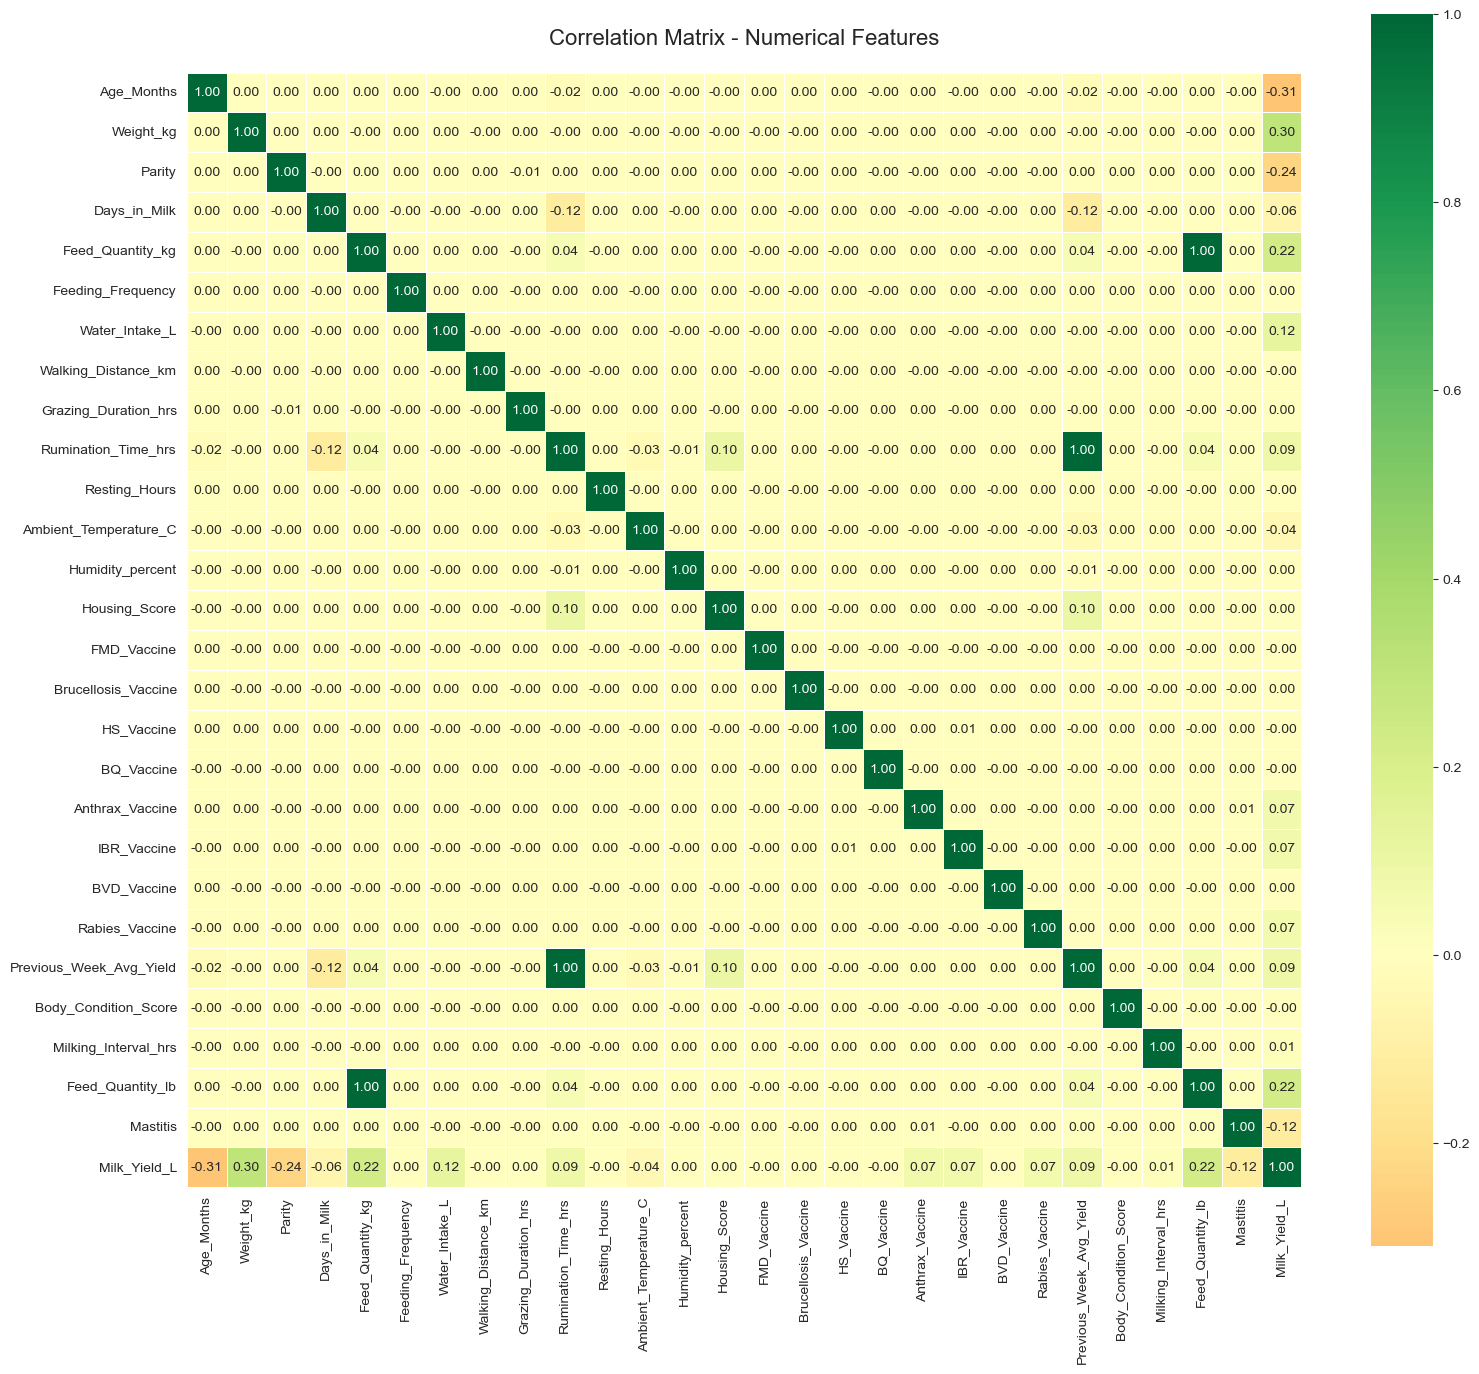


PREVIOUS WEEK AVG YIELD ANALYSIS


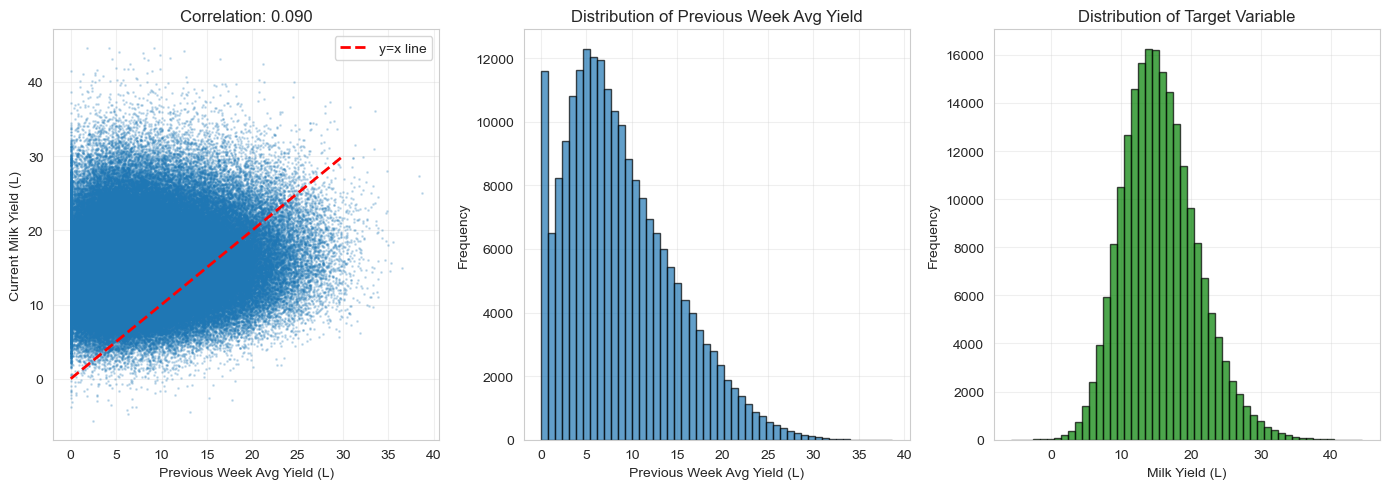


TARGET VARIABLE (MILK_YIELD_L) STATISTICS
count    210000.000000
mean         15.589156
std           5.352079
min          -5.700324
25%          11.822207
50%          15.145871
75%          18.884708
max          44.555285
Name: Milk_Yield_L, dtype: float64


In [125]:
# ============================================
# COMPREHENSIVE DATA EXPLORATION
# ============================================

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# First, let's see what columns we actually have
print("="*60)
print("ACTUAL COLUMNS IN DATASET")
print("="*60)
print(train_data.columns.tolist())
print(f"\nTotal columns: {len(train_data.columns)}")

# Get only the numerical columns that actually exist
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID columns and target variable
numerical_features = [col for col in numerical_features if col not in ['Cattle_ID', 'Farm_ID', 'Milk_Yield_L']]

print("\n" + "="*60)
print("NUMERICAL FEATURES FOUND")
print("="*60)
print(numerical_features)

# Get categorical columns
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
print("\n" + "="*60)
print("CATEGORICAL FEATURES FOUND")
print("="*60)
print(categorical_features)

# 1. MISSING VALUES
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing = train_data.isnull().sum()
missing_pct = (missing / len(train_data)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# 2. CORRELATION WITH TARGET
print("\n" + "="*60)
print("TOP CORRELATIONS WITH MILK YIELD")
print("="*60)
correlation_data = train_data[numerical_features + ['Milk_Yield_L']]
correlations = correlation_data.corr()['Milk_Yield_L'].sort_values(ascending=False)
print(correlations)

# 3. CORRELATION HEATMAP
plt.figure(figsize=(16, 14))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 4. VISUALIZE PREVIOUS WEEK (if it exists)
if 'Previous_Week_Avg_Yield' in train_data.columns:
    print("\n" + "="*60)
    print("PREVIOUS WEEK AVG YIELD ANALYSIS")
    print("="*60)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(train_data['Previous_Week_Avg_Yield'], train_data['Milk_Yield_L'],
                alpha=0.2, s=1)
    plt.plot([0, 30], [0, 30], 'r--', linewidth=2, label='y=x line')
    plt.xlabel('Previous Week Avg Yield (L)')
    plt.ylabel('Current Milk Yield (L)')
    plt.title(f'Correlation: {correlations["Previous_Week_Avg_Yield"]:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.hist(train_data['Previous_Week_Avg_Yield'], bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Previous Week Avg Yield (L)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Previous Week Avg Yield')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    plt.hist(train_data['Milk_Yield_L'], bins=50, edgecolor='black', alpha=0.7, color='green')
    plt.xlabel('Milk Yield (L)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Target Variable')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 5. TARGET VARIABLE STATISTICS
print("\n" + "="*60)
print("TARGET VARIABLE (MILK_YIELD_L) STATISTICS")
print("="*60)
print(train_data['Milk_Yield_L'].describe())

# Analyze Categorical Features


CATEGORICAL FEATURES ANALYSIS

Cattle_ID
                    mean  std  count
Cattle_ID                           
CATTLE_150032  44.555285  NaN      1
CATTLE_193450  44.536204  NaN      1
CATTLE_224494  44.500375  NaN      1
CATTLE_164202  44.219211  NaN      1
CATTLE_045989  43.974357  NaN      1
...                  ...  ...    ...
CATTLE_027345  -3.827216  NaN      1
CATTLE_047042  -4.216326  NaN      1
CATTLE_178934  -4.462703  NaN      1
CATTLE_217430  -4.684691  NaN      1
CATTLE_165478  -5.700324  NaN      1

[209966 rows x 3 columns]

Unique values: 209966

Breed
                   mean       std   count
Breed                                    
Holstien      16.043891  5.735476     112
Holstein      15.596908  5.338175  104775
Guernsey      15.584932  5.336829   31672
Jersey        15.583716  5.373115   42183
Brown Swiss   15.575446  5.384879   31155
 Brown Swiss  15.045644  5.122660      57
Brown Swiss   14.680256  5.329218      46

Unique values: 7

Climate_Zone
          

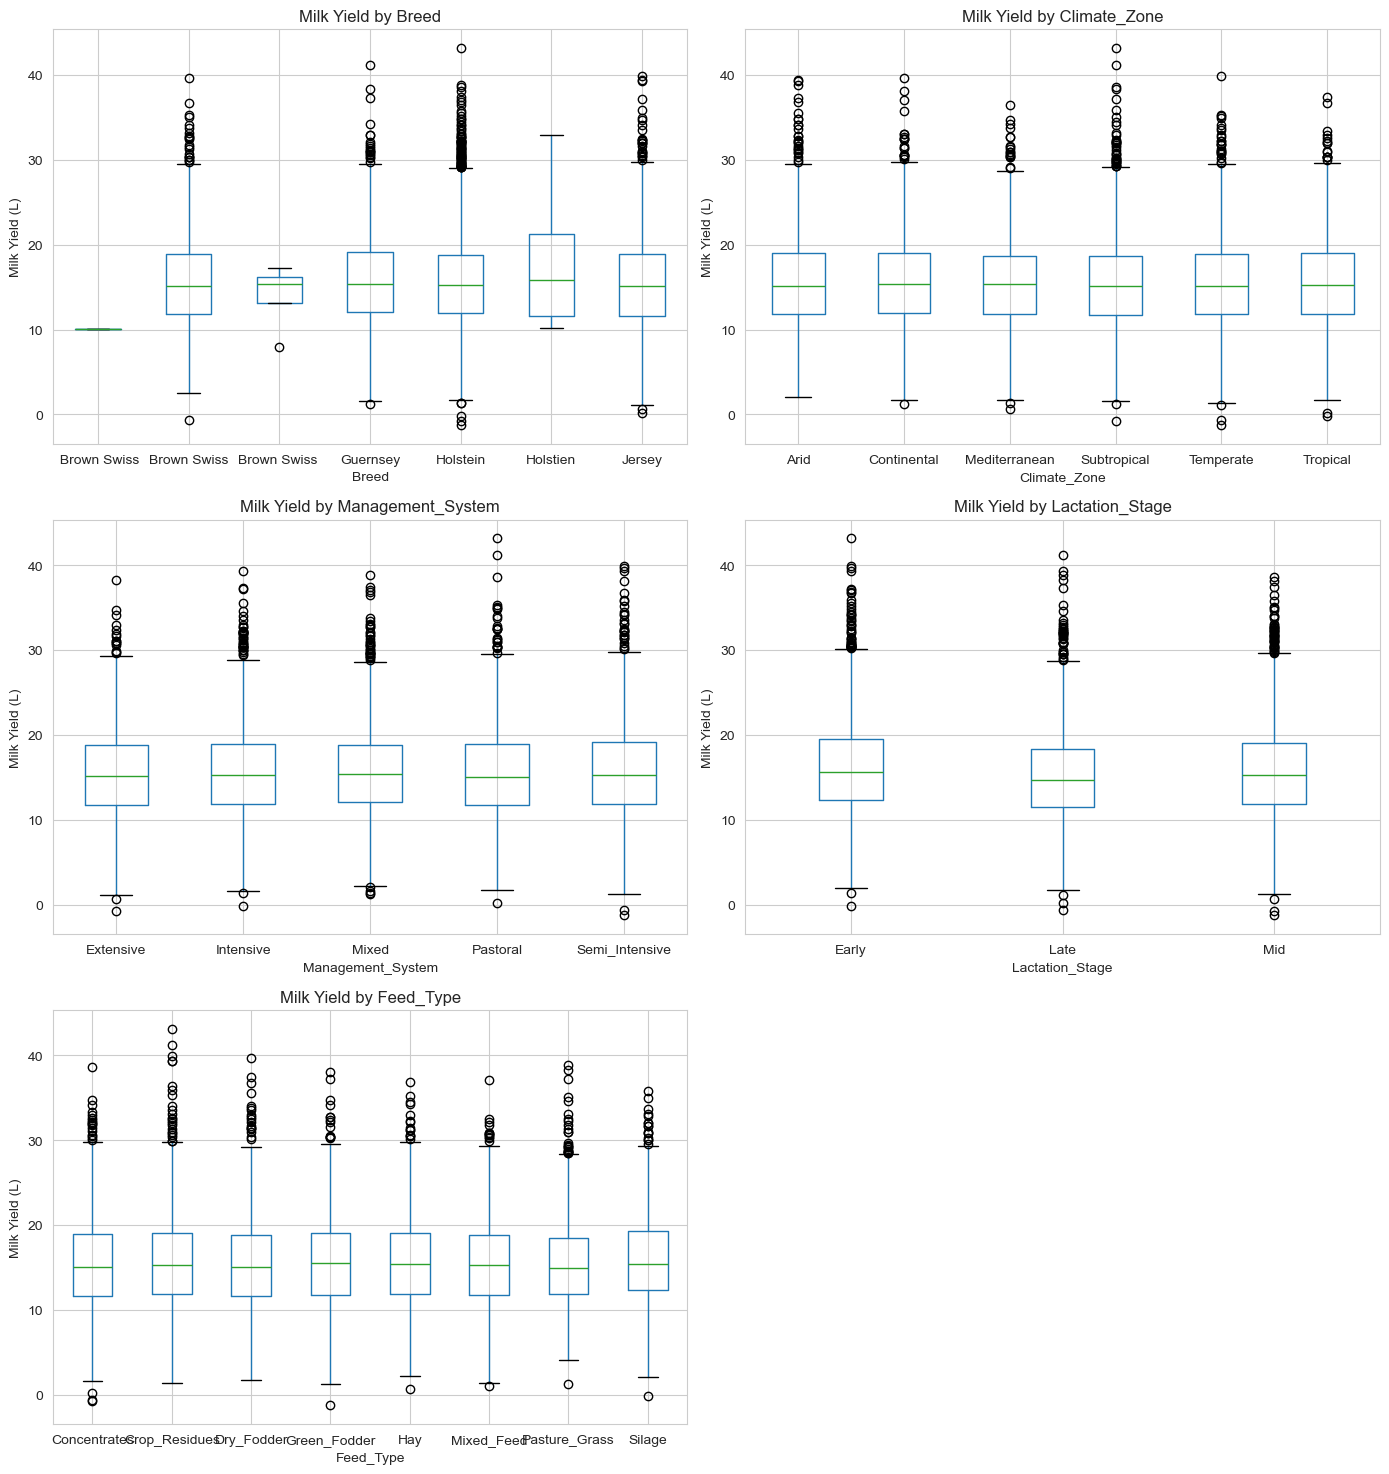

In [126]:
# ============================================
# FAST CATEGORICAL FEATURES ANALYSIS
# ============================================

print("\n" + "="*60)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*60)

categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if feature in train_data.columns:
        print(f"\n{'='*50}")
        print(f"{feature}")
        print(f"{'='*50}")

        # Get statistics
        stats = train_data.groupby(feature)['Milk_Yield_L'].agg(['mean', 'std', 'count'])
        stats = stats.sort_values('mean', ascending=False)
        print(stats)

        # Show unique values count
        print(f"\nUnique values: {train_data[feature].nunique()}")

print("\n✓ Categorical analysis complete!")

# Optional: Create plots for ONLY the most important categorical features
print("\nCreating visualizations for key categorical features...")

# Only plot features with reasonable number of categories
key_categorical = []
for feature in categorical_features:
    n_unique = train_data[feature].nunique()
    if 2 <= n_unique <= 10:  # Only if between 2 and 10 categories
        key_categorical.append(feature)

if len(key_categorical) > 0:
    # Use sample for faster plotting
    sample_data = train_data.sample(n=10000, random_state=42)

    n_features = len(key_categorical)
    n_cols = 2
    n_rows = (n_features + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    for idx, feature in enumerate(key_categorical):
        sample_data.boxplot(column='Milk_Yield_L', by=feature, ax=axes[idx])
        axes[idx].set_title(f'Milk Yield by {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Milk Yield (L)')
        axes[idx].get_figure().suptitle('')  # Remove automatic title

    # Hide extra subplots
    for idx in range(len(key_categorical), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features with suitable number of categories for plotting.")

# Check for Outliers

In [127]:
# ============================================
# QUICK OUTLIER STATISTICS (NO PLOTS)
# ============================================

print("\n" + "="*60)
print("OUTLIER DETECTION (Statistics Only)")
print("="*60)

key_features = ['Age_Months', 'Weight_kg', 'Milk_Yield_L',
                'Previous_Week_Avg_Yield', 'Days_in_Milk']

for feature in key_features:
    if feature in train_data.columns:
        Q1 = train_data[feature].quantile(0.25)
        Q3 = train_data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((train_data[feature] < lower_bound) |
                   (train_data[feature] > upper_bound)).sum()
        outlier_pct = (outliers / len(train_data)) * 100

        print(f"\n{feature}:")
        print(f"  Range: [{train_data[feature].min():.2f}, {train_data[feature].max():.2f}]")
        print(f"  IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  Outliers: {outliers:,} ({outlier_pct:.2f}%)")


OUTLIER DETECTION (Statistics Only)

Age_Months:
  Range: [24.00, 143.00]
  IQR bounds: [-36.00, 204.00]
  Outliers: 0 (0.00%)

Weight_kg:
  Range: [250.00, 750.00]
  IQR bounds: [-3.05, 1002.95]
  Outliers: 0 (0.00%)

Milk_Yield_L:
  Range: [-5.70, 44.56]
  IQR bounds: [1.23, 29.48]
  Outliers: 2,677 (1.27%)

Previous_Week_Avg_Yield:
  Range: [0.00, 38.67]
  IQR bounds: [-7.94, 24.62]
  Outliers: 2,406 (1.15%)

Days_in_Milk:
  Range: [1.00, 364.00]
  IQR bounds: [-182.00, 546.00]
  Outliers: 0 (0.00%)


# Data Cleaning & Feature Engineering

## Handle Missing Values

In [128]:
# ============================================
# DATA CLEANING - HANDLE MISSING VALUES
# ============================================

print("Handling missing values...")

# For numerical columns with missing values, use median
train_data['Feed_Quantity_kg'].fillna(train_data['Feed_Quantity_kg'].median(), inplace=True)
train_data['Feed_Quantity_lb'].fillna(train_data['Feed_Quantity_lb'].median(), inplace=True)
train_data['Housing_Score'].fillna(train_data['Housing_Score'].median(), inplace=True)

# Drop rows where any remaining missing values exist
# This addresses the single missing values found in many columns, including the target
train_data.dropna(inplace=True)

# Verify no more missing values
print("\nMissing values after cleaning:")
print(train_data.isnull().sum()[train_data.isnull().sum() > 0])
if train_data.isnull().sum().sum() == 0:
    print("✓ All missing values handled!")

Handling missing values...



Missing values after cleaning:


/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_722/2564155075.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Feed_Quantity_kg'].fillna(train_data['Feed_Quantity_kg'].median(), inplace=True)
/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_722/2564155075.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

Series([], dtype: int64)
✓ All missing values handled!


In [129]:
# ============================================
# FEATURE ENGINEERING
# ============================================

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# 1. Age-Weight interaction (older, heavier cows might behave differently)
train_data['Age_Weight_Interaction'] = train_data['Age_Months'] * train_data['Weight_kg']

# 2. Feed efficiency (feed per kg of body weight)
train_data['Feed_Efficiency'] = train_data['Feed_Quantity_kg'] / train_data['Weight_kg']

# 3. Water efficiency (water per kg of body weight)
train_data['Water_Efficiency'] = train_data['Water_Intake_L'] / train_data['Weight_kg']

# 4. Activity level (walking + grazing + rumination)
train_data['Total_Activity_hrs'] = (train_data['Walking_Distance_km'] +
                                     train_data['Grazing_Duration_hrs'] +
                                     train_data['Rumination_Time_hrs'])

# 5. Previous week difference from mean (is this cow producing above/below average?)
train_data['Prev_Week_vs_Mean'] = train_data['Previous_Week_Avg_Yield'] - train_data['Previous_Week_Avg_Yield'].mean()

# 6. Days in milk squared (non-linear relationship)
train_data['Days_in_Milk_Squared'] = train_data['Days_in_Milk'] ** 2

# 7. Age categories (young, prime, old)
train_data['Age_Category'] = pd.cut(train_data['Age_Months'],
                                     bins=[0, 36, 84, 200],
                                     labels=['Young', 'Prime', 'Old'])

print("✓ Created new features!")
print(f"Total features now: {train_data.shape[1]}")


FEATURE ENGINEERING
✓ Created new features!
Total features now: 43


## Advanced Domain-Specific Feature Engineering

Additional features based on dairy science knowledge to improve prediction accuracy.


In [130]:
# ============================================
# ADVANCED DOMAIN-SPECIFIC FEATURE ENGINEERING
# ============================================

print("\n" + "="*60)
print("ADVANCED DOMAIN-SPECIFIC FEATURE ENGINEERING")
print("="*60)

# 1. Lactation Efficiency (yield per day in current stage)
train_data['Lactation_Efficiency'] = train_data['Previous_Week_Avg_Yield'] / (train_data['Days_in_Milk'] + 1)

# 2. Feed Quality Score (combining quantity and frequency)
train_data['Feed_Quality_Score'] = train_data['Feed_Quantity_kg'] * train_data['Feeding_Frequency']

# 3. Activity Balance (SIMPLIFIED - removed complex ratio to reduce overfitting)
# train_data['Activity_Balance'] = (train_data['Walking_Distance_km'] + 
#                                   train_data['Grazing_Duration_hrs']) / (train_data['Resting_Hours'] + 1)

# 4. Health Score (SIMPLIFIED - removed to reduce overfitting)
# vaccine_count = (train_data['FMD_Vaccine'] + train_data['Brucellosis_Vaccine'] + 
#                  train_data['HS_Vaccine'] + train_data['BQ_Vaccine'] + 
#                  train_data['Anthrax_Vaccine'] + train_data['IBR_Vaccine'] + 
#                  train_data['BVD_Vaccine'] + train_data['Rabies_Vaccine'])
# train_data['Health_Score'] = vaccine_count + train_data['Body_Condition_Score']

# 5. Environmental Stress Index (REMOVED - complex computation may cause overfitting)
# temp_deviation = train_data['Ambient_Temperature_C'] - 20
# humidity_deviation = train_data['Humidity_percent'] - 50
# train_data['Environmental_Stress'] = (temp_deviation**2 + humidity_deviation**2) / 100

# 6. Production Potential (age, weight, parity combined)
train_data['Production_Potential'] = (train_data['Age_Months'] / 100) * (train_data['Weight_kg'] / 100) * train_data['Parity']

# 7. Feed-to-Water Ratio
train_data['Feed_Water_Ratio'] = train_data['Feed_Quantity_kg'] / (train_data['Water_Intake_L'] + 1)

# 8. Milking Efficiency (previous yield vs current milking interval)
train_data['Milking_Efficiency'] = train_data['Previous_Week_Avg_Yield'] / (train_data['Milking_Interval_hrs'] + 1)

# 9. Prime Production Indicator (REMOVED - may cause overfitting)
# train_data['Prime_Production'] = ((train_data['Age_Months'] >= 36) & 
#                                    (train_data['Age_Months'] <= 84)).astype(int) * train_data['Parity']

# 10. Body Condition Efficiency (REMOVED - redundant with existing features)
# train_data['BCS_Efficiency'] = train_data['Body_Condition_Score'] * train_data['Weight_kg'] / 1000

# 11. Age normalization (convert to years) - KEEP: Simple and useful
train_data['Age_Years'] = train_data['Age_Months'] / 12

# 12. Weight normalization (scale to 0-10 range) - KEEP: Simple and useful
train_data['Weight_Normalized'] = train_data['Weight_kg'] / 100

# 13. Temperature and Humidity comfort scores (REMOVED - complex computation may overfit)
# train_data['Temp_Deviation'] = abs(train_data['Ambient_Temperature_C'] - 20)
# train_data['Temp_Comfort_Score'] = 1 / (1 + train_data['Temp_Deviation'])
# train_data['Humidity_Deviation'] = abs(train_data['Humidity_percent'] - 50)
# train_data['Humidity_Comfort_Score'] = 1 / (1 + train_data['Humidity_Deviation'])

# Handle infinite values from division
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

print("✓ Created simplified advanced domain-specific features!")
print(f"Total features now: {train_data.shape[1]}")
print(f"\nNew features added (SIMPLIFIED SET):")
new_features = ['Lactation_Efficiency', 'Feed_Quality_Score', 'Production_Potential',
                'Feed_Water_Ratio', 'Milking_Efficiency', 'Age_Years', 'Weight_Normalized']
print(f"  - {len(new_features)} new features created")
print(f"  - Removed complex features that may cause overfitting")



ADVANCED DOMAIN-SPECIFIC FEATURE ENGINEERING
✓ Created simplified advanced domain-specific features!
Total features now: 50

New features added (SIMPLIFIED SET):
  - 7 new features created
  - Removed complex features that may cause overfitting


# Encode Categorical Variables

In [131]:
# ============================================
# ENCODE CATEGORICAL VARIABLES
# ============================================

print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

from sklearn.preprocessing import LabelEncoder

# Make a copy for encoding
train_encoded = train_data.copy()

# Categorical columns to encode
categorical_cols = ['Breed', 'Climate_Zone', 'Management_System',
                   'Lactation_Stage', 'Feed_Type', 'Date', 'Age_Category']

# Method 1: Label Encoding for ordinal features
label_encoders = {}
for col in categorical_cols:
    if col in train_encoded.columns:
        le = LabelEncoder()
        train_encoded[col + '_Encoded'] = le.fit_transform(train_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ Encoded {col}")

# Method 2: One-Hot Encoding for nominal features (creates multiple columns)
# For features with few categories, one-hot encoding works better
train_encoded = pd.get_dummies(train_encoded,
                                columns=['Breed', 'Climate_Zone', 'Management_System',
                                        'Lactation_Stage', 'Feed_Type'],
                                prefix=['Breed', 'Climate', 'Mgmt', 'Lactation', 'Feed'],
                                drop_first=True)  # Avoid multicollinearity

print(f"\n✓ Encoding complete!")
print(f"Total columns after encoding: {train_encoded.shape[1]}")


ENCODING CATEGORICAL VARIABLES
✓ Encoded Breed
✓ Encoded Climate_Zone
✓ Encoded Management_System
✓ Encoded Lactation_Stage
✓ Encoded Feed_Type
✓ Encoded Date
✓ Encoded Age_Category

✓ Encoding complete!
Total columns after encoding: 76


## Feature Selection

Remove redundant and low-importance features to improve model performance.


In [132]:
# ============================================
# FEATURE SELECTION - REMOVE REDUNDANT FEATURES
# ============================================

print("\n" + "="*60)
print("FEATURE SELECTION")
print("="*60)

# Create a copy for feature selection
X_for_selection = X.copy()

# 1. Remove constant/near-constant features
print("\n1. Checking for constant/near-constant features...")
constant_features = []
for col in X_for_selection.columns:
    n_unique = X_for_selection[col].nunique()
    if n_unique <= 1:
        constant_features.append(col)
    elif n_unique == 2:
        value_counts = X_for_selection[col].value_counts()
        if len(value_counts) > 0 and value_counts.iloc[0] / len(X_for_selection) > 0.99:
            constant_features.append(col)

if constant_features:
    print(f"   Found {len(constant_features)} constant/near-constant features: {constant_features}")
    X_for_selection = X_for_selection.drop(columns=constant_features)
else:
    print("   ✓ No constant features found")

# 2. Remove highly correlated features (>0.95)
print("\n2. Checking for highly correlated features...")
corr_matrix = X_for_selection.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_to_remove = []
for col in upper_triangle.columns:
    if col not in high_corr_to_remove:
        correlated = upper_triangle.index[upper_triangle[col] > 0.95].tolist()
        if correlated:
            # Keep the one with higher correlation to target
            for corr_feat in correlated:
                if corr_feat not in high_corr_to_remove:
                    corr_to_target_col = abs(X_for_selection[col].corr(y)) if col in X_for_selection.columns else 0
                    corr_to_target_feat = abs(X_for_selection[corr_feat].corr(y)) if corr_feat in X_for_selection.columns else 0
                    if corr_to_target_col >= corr_to_target_feat:
                        high_corr_to_remove.append(corr_feat)
                    else:
                        high_corr_to_remove.append(col)
                        break

if high_corr_to_remove:
    print(f"   Found {len(high_corr_to_remove)} highly correlated features to remove: {high_corr_to_remove[:5]}...")
    X_for_selection = X_for_selection.drop(columns=high_corr_to_remove)
else:
    print("   ✓ No highly correlated features found")

# 3. Remove low variance features
print("\n3. Checking for low variance features...")
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
try:
    X_var_filtered = selector.fit_transform(X_for_selection)
    low_variance_mask = ~selector.get_support()
    low_variance_features = X_for_selection.columns[low_variance_mask].tolist()
    
    if low_variance_features:
        print(f"   Found {len(low_variance_features)} low variance features: {low_variance_features[:5]}...")
        X_for_selection = X_for_selection.drop(columns=low_variance_features)
    else:
        print("   ✓ No low variance features found")
except:
    print("   ⚠️  Variance threshold check skipped")

# DISABLED: Feature removal may hurt performance - keeping all features
# Analysis only: report what would be removed but don't actually remove
features_removed = len(X.columns) - len(X_for_selection.columns)
if features_removed > 0:
    print(f"\n⚠️  Feature selection analysis complete (FEATURES NOT REMOVED)")
    print(f"  Would remove {features_removed} features ({features_removed/len(X.columns)*100:.1f}%)")
    print(f"  But keeping all features to avoid performance degradation")
    print(f"  Features kept: {len(X.columns)}")
else:
    print(f"\n✓ Feature selection analysis: No features would be removed")
    print(f"  Keeping all {len(X.columns)} features")
# Note: X and feature_columns remain unchanged - no features removed



FEATURE SELECTION



1. Checking for constant/near-constant features...
   Found 2 constant/near-constant features: ['Breed_Brown Swiss ', 'Breed_Holstien']

2. Checking for highly correlated features...
   Found 5 highly correlated features to remove: ['Rumination_Time_hrs', 'Prev_Week_vs_Mean', 'Days_in_Milk', 'Age_Years', 'Weight_Normalized']...

3. Checking for low variance features...
   Found 3 low variance features: ['Feed_Efficiency', 'Water_Efficiency', 'Feed_Water_Ratio']...

⚠️  Feature selection analysis complete (FEATURES NOT REMOVED)
  Would remove 10 features (13.5%)
  But keeping all features to avoid performance degradation
  Features kept: 74


# Prepare Data for Modeling

In [133]:
# ============================================
# PREPARE DATA FOR MODELING
# ============================================

print("\n" + "="*60)
print("PREPARING DATA FOR MODELING")
print("="*60)

# Remove columns we don't need for modeling
columns_to_drop = ['Cattle_ID', 'Farm_ID', 'Date', 'Age_Category',
                   'Breed_Encoded', 'Climate_Zone_Encoded', 'Management_System_Encoded',
                   'Lactation_Stage_Encoded', 'Feed_Type_Encoded']

# Remove redundant features
# Feed_Quantity_lb is redundant with Feed_Quantity_kg (just a unit conversion)
redundant_features = ['Feed_Quantity_lb']

# Keep only columns that exist
columns_to_drop = [col for col in columns_to_drop if col in train_encoded.columns]
redundant_features = [col for col in redundant_features if col in train_encoded.columns]

# Separate features and target
X = train_encoded.drop(columns_to_drop + redundant_features + ['Milk_Yield_L'], axis=1)
y = train_encoded['Milk_Yield_L']

# Store feature columns names for consistent processing of test data
feature_columns = X.columns

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n✓ Data ready for modeling!")


PREPARING DATA FOR MODELING
Features shape: (210000, 65)
Target shape: (210000,)

✓ Data ready for modeling!


# Split Data & Start Modeling

In [134]:
# ============================================
# SPLIT DATA AND BASELINE MODEL
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

# BASELINE MODEL: Simple Linear Regression
print("\n" + "="*60)
print("BASELINE MODEL: LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R²: {val_r2:.4f}")

print("\n✓ Baseline model complete!")

Training set: 168000 samples
Validation set: 42000 samples

BASELINE MODEL: LINEAR REGRESSION
Training RMSE: 4.2960
Validation RMSE: 4.3119
Validation R²: 0.3525

✓ Baseline model complete!


## baseline model is working and you have a Validation RMSE of 4.31, which is a solid start. Now let's improve it by trying more advanced models.

## New Models Added (Based on DiegoVersion Strategies)

We've added the following models to match the techniques used in DiegoVersion:

1. **Decision Tree Regressor** - A single decision tree model (different from Random Forest which uses multiple trees)
2. **Support Vector Regressor (SVM)** - Support Vector Machine adapted for regression
3. **Naive Bayes (Adapted for Regression)** - Naive Bayes classifier adapted for regression by discretizing the target variable

### Strategies Implemented from DiegoVersion:

- **Feature Importance Analysis**: Added for Decision Tree (similar to Random Forest)
- **Hyperparameter Tuning**: Already implemented for XGBoost (similar to DiegoVersion's GridSearchCV approach)
- **Feature Scaling**: StandardScaler used (similar to DiegoVersion's approach)
- **Model Comparison**: Updated to include all new models with RMSE and R² metrics


## Try Advanced Models

# 1. Random Forest Regressor

In [135]:
# ============================================
# MODEL 2: RANDOM FOREST
# ============================================

from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST")
print("="*60)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Validation RMSE: {val_rmse_rf:.4f}")
print(f"Validation R²: {val_r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


MODEL 2: RANDOM FOREST
Training RMSE: 2.4821
Validation RMSE: 4.3436
Validation R²: 0.3429

Top 10 Most Important Features:
                  feature  importance
4        Feed_Quantity_kg    0.078769
0              Age_Months    0.076346
38      Weight_Normalized    0.070344
37              Age_Years    0.066783
1               Weight_kg    0.066352
2                  Parity    0.058554
34   Production_Potential    0.040973
6          Water_Intake_L    0.040955
39           Date_Encoded    0.035670
11  Ambient_Temperature_C    0.028707


## 1.5 Decision Tree Regressor


In [136]:
# ============================================
# MODEL 1.5: DECISION TREE
# ============================================

from sklearn.tree import DecisionTreeRegressor

print("\n" + "="*60)
print("MODEL 1.5: DECISION TREE")
print("="*60)

# Train Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=20,          # Maximum depth of tree
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,    # Minimum samples in leaf
    random_state=42
)

dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_val_pred_dt = dt_model.predict(X_val)

# Calculate RMSE
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
val_rmse_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Training RMSE: {train_rmse_dt:.4f}")
print(f"Validation RMSE: {val_rmse_dt:.4f}")
print(f"Validation R²: {val_r2_dt:.4f}")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_dt.head(10))



MODEL 1.5: DECISION TREE


Training RMSE: 2.6489
Validation RMSE: 5.4933
Validation R²: -0.0510

Top 10 Most Important Features:
                  feature  importance
37              Age_Years    0.143766
1               Weight_kg    0.122334
4        Feed_Quantity_kg    0.081343
2                  Parity    0.066435
6          Water_Intake_L    0.040701
34   Production_Potential    0.040294
39           Date_Encoded    0.038737
11  Ambient_Temperature_C    0.024871
12       Humidity_percent    0.024080
32   Lactation_Efficiency    0.023948


## 2. Gradient Boosting Regressor

In [137]:
# ============================================
# MODEL 3: GRADIENT BOOSTING
# ============================================

from sklearn.ensemble import GradientBoostingRegressor

print("\n" + "="*60)
print("MODEL 3: GRADIENT BOOSTING")
print("="*60)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)

# Calculate RMSE
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
val_r2_gb = r2_score(y_val, y_val_pred_gb)

print(f"Training RMSE: {train_rmse_gb:.4f}")
print(f"Validation RMSE: {val_rmse_gb:.4f}")
print(f"Validation R²: {val_r2_gb:.4f}")


MODEL 3: GRADIENT BOOSTING


Training RMSE: 4.0565
Validation RMSE: 4.1573
Validation R²: 0.3981


## 2.5 Support Vector Regressor (SVM)


In [138]:
# ============================================
# MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)
# ============================================

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

print("\n" + "="*60)
print("MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)")
print("="*60)

# Note: SVR is sensitive to feature scaling, so we use the already scaled data
# X_train and X_val are already scaled from previous steps

# Train SVR with optimized parameters
# SVR training time scales roughly O(n²) to O(n³) with number of samples
# Reduced sample size for faster training:
# - 10,000 samples: ~2-5 minutes (FAST - current setting)
# - 20,000 samples: ~5-10 minutes (BALANCED)
# - 50,000 samples: ~15-30 minutes (SLOW but better results)
sample_size = min(20000, len(X_train))  # Fast option - change to 20000 or 50000 if needed

np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(len(X_train), sample_size, replace=False)

# Handle both DataFrame and array cases
if isinstance(X_train, pd.DataFrame):
    X_train_svr = X_train.iloc[sample_indices]
    y_train_svr = y_train.iloc[sample_indices] if isinstance(y_train, pd.Series) else y_train[sample_indices]
else:
    X_train_svr = X_train[sample_indices]
    y_train_svr = y_train[sample_indices]

svr_model = SVR(
    kernel='rbf',          # Radial Basis Function kernel
    C=100,                 # Regularization parameter
    epsilon=0.1,           # Epsilon-tube for regression
    gamma='scale'          # Kernel coefficient
)

import time
print(f"Training SVR on {len(X_train_svr)} samples (out of {len(X_train)} total)...")
print("Expected time: 2-5 minutes...")

start_time = time.time()
svr_model.fit(X_train_svr, y_train_svr)
training_time = time.time() - start_time
print(f"✓ Training completed in {training_time:.1f} seconds ({training_time/60:.1f} minutes)")

# Predictions
y_train_pred_svr = svr_model.predict(X_train)
y_val_pred_svr = svr_model.predict(X_val)

# Calculate RMSE
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
val_rmse_svr = np.sqrt(mean_squared_error(y_val, y_val_pred_svr))
val_r2_svr = r2_score(y_val, y_val_pred_svr)

print(f"Training RMSE: {train_rmse_svr:.4f}")
print(f"Validation RMSE: {val_rmse_svr:.4f}")
print(f"Validation R²: {val_r2_svr:.4f}")



MODEL 2.5: SUPPORT VECTOR REGRESSOR (SVM)
Training SVR on 20000 samples (out of 168000 total)...
Expected time: 2-5 minutes...


✓ Training completed in 346.4 seconds (5.8 minutes)
Training RMSE: 4.8015
Validation RMSE: 5.1384
Validation R²: 0.0805


## 3. XGBoost (Usually Best for Tabular Data)

In [139]:
# ============================================
# MODEL 4: XGBOOST
# ============================================

# First, install xgboost if not already installed
# !pip install xgboost

import xgboost as xgb

print("\n" + "="*60)
print("MODEL 4: XGBOOST")
print("="*60)

# Train XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_val_pred_xgb = xgb_model.predict(X_val)

# Calculate RMSE
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Validation RMSE: {val_rmse_xgb:.4f}")
print(f"Validation R²: {val_r2_xgb:.4f}")


MODEL 4: XGBOOST
Training RMSE: 3.9949
Validation RMSE: 4.1545
Validation R²: 0.3989


## 4.7 Regularized Linear Models (Ridge, Lasso, ElasticNet)

Regularized linear models that can handle multicollinearity and perform feature selection.


In [140]:
# ============================================
# MODEL 4.7: RIDGE REGRESSION (L2 Regularization)
# ============================================

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

print("\n" + "="*60)
print("MODEL 4.7: RIDGE REGRESSION")
print("="*60)

# Hyperparameter tuning for Ridge
ridge_param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

print("Tuning Ridge Regression...")
# Note: X_train and X_val are already scaled (from train_test_split on X_scaled)
ridge_grid.fit(X_train, y_train)

ridge_model = ridge_grid.best_estimator_

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge = ridge_model.predict(X_val)

# Calculate RMSE
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
val_rmse_ridge = np.sqrt(mean_squared_error(y_val, y_val_pred_ridge))
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

print(f"\nBest alpha: {ridge_grid.best_params_['alpha']}")
print(f"Training RMSE: {train_rmse_ridge:.4f}")
print(f"Validation RMSE: {val_rmse_ridge:.4f}")
print(f"Validation R²: {val_r2_ridge:.4f}")



MODEL 4.7: RIDGE REGRESSION
Tuning Ridge Regression...



Best alpha: 100
Training RMSE: 4.2960
Validation RMSE: 4.3119
Validation R²: 0.3525


In [141]:
# ============================================
# MODEL 4.8: LASSO REGRESSION (L1 Regularization)
# ============================================

from sklearn.linear_model import Lasso

print("\n" + "="*60)
print("MODEL 4.8: LASSO REGRESSION")
print("="*60)

# Hyperparameter tuning for Lasso
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(
    Lasso(random_state=42, max_iter=2000),
    lasso_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

print("Tuning Lasso Regression...")
# Note: X_train and X_val are already scaled (from train_test_split on X_scaled)
lasso_grid.fit(X_train, y_train)

lasso_model = lasso_grid.best_estimator_

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_val_pred_lasso = lasso_model.predict(X_val)

# Calculate RMSE
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
val_rmse_lasso = np.sqrt(mean_squared_error(y_val, y_val_pred_lasso))
val_r2_lasso = r2_score(y_val, y_val_pred_lasso)

# Count non-zero coefficients (feature selection)
n_features_selected = np.sum(np.abs(lasso_model.coef_) > 1e-5)

print(f"\nBest alpha: {lasso_grid.best_params_['alpha']}")
print(f"Features selected: {n_features_selected} / {len(X.columns)}")
print(f"Training RMSE: {train_rmse_lasso:.4f}")
print(f"Validation RMSE: {val_rmse_lasso:.4f}")
print(f"Validation R²: {val_r2_lasso:.4f}")



MODEL 4.8: LASSO REGRESSION
Tuning Lasso Regression...

Best alpha: 0.001
Features selected: 51 / 65
Training RMSE: 4.2961
Validation RMSE: 4.3119
Validation R²: 0.3525


In [142]:
# ============================================
# MODEL 4.9: ELASTIC NET (L1 + L2 Regularization)
# ============================================

from sklearn.linear_model import ElasticNet

print("\n" + "="*60)
print("MODEL 4.9: ELASTIC NET")
print("="*60)

# Hyperparameter tuning for ElasticNet
elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_grid = GridSearchCV(
    ElasticNet(random_state=42, max_iter=2000),
    elastic_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

print("Tuning ElasticNet...")
# Note: X_train and X_val are already scaled (from train_test_split on X_scaled)
elastic_grid.fit(X_train, y_train)

elastic_model = elastic_grid.best_estimator_

# Predictions
y_train_pred_elastic = elastic_model.predict(X_train)
y_val_pred_elastic = elastic_model.predict(X_val)

# Calculate RMSE
train_rmse_elastic = np.sqrt(mean_squared_error(y_train, y_train_pred_elastic))
val_rmse_elastic = np.sqrt(mean_squared_error(y_val, y_val_pred_elastic))
val_r2_elastic = r2_score(y_val, y_val_pred_elastic)

print(f"\nBest parameters: {elastic_grid.best_params_}")
print(f"Training RMSE: {train_rmse_elastic:.4f}")
print(f"Validation RMSE: {val_rmse_elastic:.4f}")
print(f"Validation R²: {val_r2_elastic:.4f}")



MODEL 4.9: ELASTIC NET
Tuning ElasticNet...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.010e+04, tolerance: 3.844e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.979e+04, tolerance: 3.850e+02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.350e+04, toler


Best parameters: {'alpha': 0.001, 'l1_ratio': 0.9}
Training RMSE: 4.2961
Validation RMSE: 4.3119
Validation R²: 0.3525


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+04, tolerance: 4.809e+02
  model = cd_fast.enet_coordinate_descent(


## 4.5 CatBoost and LightGBM (Advanced Gradient Boosting Models)

CatBoost and LightGBM are advanced gradient boosting frameworks that often outperform XGBoost on tabular data:
- **CatBoost**: Handles categorical features natively, provides excellent out-of-the-box performance
- **LightGBM**: Faster training, good accuracy, efficient memory usage


In [143]:
# ============================================
# MODEL 4.5: CATBOOST
# ============================================

try:
    from catboost import CatBoostRegressor
except ImportError:
    print("Installing CatBoost...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'catboost', '--quiet'])
    from catboost import CatBoostRegressor

print("\n" + "="*60)
print("MODEL 4.5: CATBOOST")
print("="*60)

# Train CatBoost (handles categoricals natively, but we'll use already encoded features)
cat_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0,  # Set to 100 to see progress
    task_type='CPU'
)

cat_model.fit(X_train, y_train)

# Predictions
y_train_pred_cat = cat_model.predict(X_train)
y_val_pred_cat = cat_model.predict(X_val)

# Calculate RMSE
train_rmse_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))
val_rmse_cat = np.sqrt(mean_squared_error(y_val, y_val_pred_cat))
val_r2_cat = r2_score(y_val, y_val_pred_cat)

print(f"Training RMSE: {train_rmse_cat:.4f}")
print(f"Validation RMSE: {val_rmse_cat:.4f}")
print(f"Validation R²: {val_r2_cat:.4f}")

# Feature importance
feature_importance_cat = pd.DataFrame({
    'feature': X.columns,
    'importance': cat_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (CatBoost):")
print(feature_importance_cat.head(10))



MODEL 4.5: CATBOOST
Training RMSE: 4.1003
Validation RMSE: 4.1428
Validation R²: 0.4023

Top 10 Most Important Features (CatBoost):
              feature  importance
37          Age_Years   15.424680
39       Date_Encoded   14.319445
2              Parity   13.188160
4    Feed_Quantity_kg   11.336013
38  Weight_Normalized    9.235484
1           Weight_kg    8.580470
0          Age_Months    8.314426
6      Water_Intake_L    4.222998
25           Mastitis    3.994619
56     Lactation_Late    1.650910


In [144]:
# ============================================
# MODEL 4.6: LIGHTGBM
# ============================================

try:
    import lightgbm as lgb
except ImportError:
    print("Installing LightGBM...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'lightgbm', '--quiet'])
    import lightgbm as lgb

print("\n" + "="*60)
print("MODEL 4.6: LIGHTGBM")
print("="*60)

# Train LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbosity=-1  # Suppress warnings
)

lgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_lgb = lgb_model.predict(X_train)
y_val_pred_lgb = lgb_model.predict(X_val)

# Calculate RMSE
train_rmse_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
val_rmse_lgb = np.sqrt(mean_squared_error(y_val, y_val_pred_lgb))
val_r2_lgb = r2_score(y_val, y_val_pred_lgb)

print(f"Training RMSE: {train_rmse_lgb:.4f}")
print(f"Validation RMSE: {val_rmse_lgb:.4f}")
print(f"Validation R²: {val_r2_lgb:.4f}")

# Feature importance
feature_importance_lgb = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (LightGBM):")
print(feature_importance_lgb.head(10))



MODEL 4.6: LIGHTGBM


Training RMSE: 4.0155
Validation RMSE: 4.1430
Validation R²: 0.4022

Top 10 Most Important Features (LightGBM):
                  feature  importance
39           Date_Encoded        1080
4        Feed_Quantity_kg         944
1               Weight_kg         865
6          Water_Intake_L         762
3            Days_in_Milk         556
0              Age_Months         454
11  Ambient_Temperature_C         410
2                  Parity         328
34   Production_Potential         269
32   Lactation_Efficiency         231


## 3.5 Naive Bayes (Adapted for Regression)


In [145]:
# ============================================
# MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)
# ============================================

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\n" + "="*60)
print("MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)")
print("="*60)

# Naive Bayes is typically for classification, but we can adapt it for regression
# by discretizing the target variable into bins, training a classifier, 
# then using the predicted class probabilities to estimate the continuous value

# Discretize target variable into bins
n_bins = 50  # Number of bins for discretization
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val_binned = discretizer.transform(y_val.values.reshape(-1, 1)).ravel()

# Get bin centers for mapping predictions back to continuous values
bin_edges = discretizer.bin_edges_[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Train Gaussian Naive Bayes on discretized target
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_binned)

# Get predicted probabilities for each bin
y_train_proba = nb_model.predict_proba(X_train)
y_val_proba = nb_model.predict_proba(X_val)

# Convert probabilities to continuous predictions using weighted average of bin centers
y_train_pred_nb = np.dot(y_train_proba, bin_centers)
y_val_pred_nb = np.dot(y_val_proba, bin_centers)

# Calculate RMSE
train_rmse_nb = np.sqrt(mean_squared_error(y_train, y_train_pred_nb))
val_rmse_nb = np.sqrt(mean_squared_error(y_val, y_val_pred_nb))
val_r2_nb = r2_score(y_val, y_val_pred_nb)

print(f"Training RMSE: {train_rmse_nb:.4f}")
print(f"Validation RMSE: {val_rmse_nb:.4f}")
print(f"Validation R²: {val_r2_nb:.4f}")
print(f"\nNote: Naive Bayes adapted for regression using {n_bins} bins")



MODEL 3.5: NAIVE BAYES (ADAPTED FOR REGRESSION)


Training RMSE: 19.6847
Validation RMSE: 19.6253
Validation R²: -12.4135

Note: Naive Bayes adapted for regression using 50 bins


# 4. Neural Network (MLP Regressor)

In [146]:
# ============================================
# MODEL 5: NEURAL NETWORK
# ============================================

from sklearn.neural_network import MLPRegressor

print("\n" + "="*60)
print("MODEL 5: NEURAL NETWORK")
print("="*60)

# Train Neural Network
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
    activation='relu',
    alpha=0.01,                         # L2 regularization
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train, y_train)

# Predictions
y_train_pred_nn = nn_model.predict(X_train)
y_val_pred_nn = nn_model.predict(X_val)

# Calculate RMSE
train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
val_rmse_nn = np.sqrt(mean_squared_error(y_val, y_val_pred_nn))
val_r2_nn = r2_score(y_val, y_val_pred_nn)

print(f"Training RMSE: {train_rmse_nn:.4f}")
print(f"Validation RMSE: {val_rmse_nn:.4f}")
print(f"Validation R²: {val_r2_nn:.4f}")


MODEL 5: NEURAL NETWORK


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training RMSE: 3.8048
Validation RMSE: 4.7260
Validation R²: 0.2222


## ⚠️ Note on Cell Order

**Important:** For best results, run CatBoost and LightGBM cells (currently at cells 57-59) BEFORE running the comparison below, so their results will be included.

**However**, if you run this comparison cell first, it will still work - it will just show the models that have been trained so far. CatBoost and LightGBM will automatically appear in the comparison once you train them.

**Recommended order:**
1. Train all individual models (including CatBoost/LightGBM at cells 57-59)
2. Run hyperparameter tuning (cell 56)
3. Run this comparison (cell 53)
4. Create ensemble (cell 60+)


## Hyperparameter Tuning for CatBoost and LightGBM

Tune CatBoost and LightGBM models for optimal performance.


In [147]:
# ============================================
# HYPERPARAMETER TUNING - CATBOOST
# ============================================

from sklearn.model_selection import GridSearchCV

print("\n" + "="*60)
print("HYPERPARAMETER TUNING - CATBOOST")
print("="*60)

# Define parameter grid for CatBoost
cat_param_grid = {
    'iterations': [300, 400, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Create CatBoost model
cat_for_tuning = CatBoostRegressor(random_seed=42, verbose=0, loss_function='RMSE')

# GridSearchCV (using smaller grid due to computation time)
cat_grid = GridSearchCV(
    cat_for_tuning,
    param_grid={
        'iterations': [300, 400],
        'depth': [6, 8],
        'learning_rate': [0.05, 0.1],
        'l2_leaf_reg': [3, 5]
    },
    cv=3,  # Reduced CV folds for faster tuning
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Starting CatBoost hyperparameter search...")
print("(This may take several minutes...)")

cat_grid.fit(X_train, y_train)

print(f"\n✓ Best parameters found:")
print(cat_grid.best_params_)

# Train with best parameters
best_cat = cat_grid.best_estimator_

# Predictions
y_val_pred_best_cat = best_cat.predict(X_val)
val_rmse_best_cat = np.sqrt(mean_squared_error(y_val, y_val_pred_best_cat))
val_r2_best_cat = r2_score(y_val, y_val_pred_best_cat)

print(f"\n{'='*60}")
print(f"TUNED CATBOOST RESULTS")
print(f"{'='*60}")
print(f"Validation RMSE: {val_rmse_best_cat:.4f}")
print(f"Validation R²: {val_r2_best_cat:.4f}")
if 'val_rmse_cat' in locals() or 'val_rmse_cat' in globals():
    print(f"Improvement: {val_rmse_cat - val_rmse_best_cat:.4f}")



HYPERPARAMETER TUNING - CATBOOST
Starting CatBoost hyperparameter search...
(This may take several minutes...)
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✓ Best parameters found:
{'depth': 6, 'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.05}

TUNED CATBOOST RESULTS
Validation RMSE: 4.1386
Validation R²: 0.4035
Improvement: 0.0042


In [148]:
# ============================================
# HYPERPARAMETER TUNING - LIGHTGBM
# ============================================

print("\n" + "="*60)
print("HYPERPARAMETER TUNING - LIGHTGBM")
print("="*60)

# Define parameter grid for LightGBM
lgb_for_tuning = lgb.LGBMRegressor(random_state=42, verbosity=-1)

lgb_grid = GridSearchCV(
    lgb_for_tuning,
    param_grid={
        'n_estimators': [300, 400],
        'max_depth': [6, 8],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 50]
    },
    cv=3,  # Reduced CV folds for faster tuning
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Starting LightGBM hyperparameter search...")
print("(This may take several minutes...)")

lgb_grid.fit(X_train, y_train)

print(f"\n✓ Best parameters found:")
print(lgb_grid.best_params_)

# Train with best parameters
best_lgb = lgb_grid.best_estimator_

# Predictions
y_val_pred_best_lgb = best_lgb.predict(X_val)
val_rmse_best_lgb = np.sqrt(mean_squared_error(y_val, y_val_pred_best_lgb))
val_r2_best_lgb = r2_score(y_val, y_val_pred_best_lgb)

print(f"\n{'='*60}")
print(f"TUNED LIGHTGBM RESULTS")
print(f"{'='*60}")
print(f"Validation RMSE: {val_rmse_best_lgb:.4f}")
print(f"Validation R²: {val_r2_best_lgb:.4f}")
if 'val_rmse_lgb' in locals() or 'val_rmse_lgb' in globals():
    print(f"Improvement: {val_rmse_lgb - val_rmse_best_lgb:.4f}")



HYPERPARAMETER TUNING - LIGHTGBM
Starting LightGBM hyperparameter search...
(This may take several minutes...)
Fitting 3 folds for each of 16 candidates, totalling 48 fits



✓ Best parameters found:
{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 31}

TUNED LIGHTGBM RESULTS
Validation RMSE: 4.1430
Validation R²: 0.4022
Improvement: 0.0000


# 5. Compare All Models


MODEL COMPARISON SUMMARY
            Model  Train_RMSE  Val_RMSE     Val_R2
         CatBoost    4.100261  4.142771   0.402287
  XGBoost (Tuned)    3.994917  4.142832   0.402270
         LightGBM    4.015510  4.143050   0.402207
          XGBoost    3.994917  4.154496   0.398899
Gradient Boosting    4.056476  4.157302   0.398087
Linear Regression    4.296034  4.311911   0.352485
    Random Forest    2.482124  4.343567   0.342942
   Neural Network    3.804763  4.725966   0.222157
        SVM (SVR)    4.801503  5.138405   0.080467
    Decision Tree    2.648900  5.493342  -0.050954
      Naive Bayes   19.684727 19.625304 -12.413541

🏆 Best Model: CatBoost
   Validation RMSE: 4.1428
   Validation R²: 0.4023


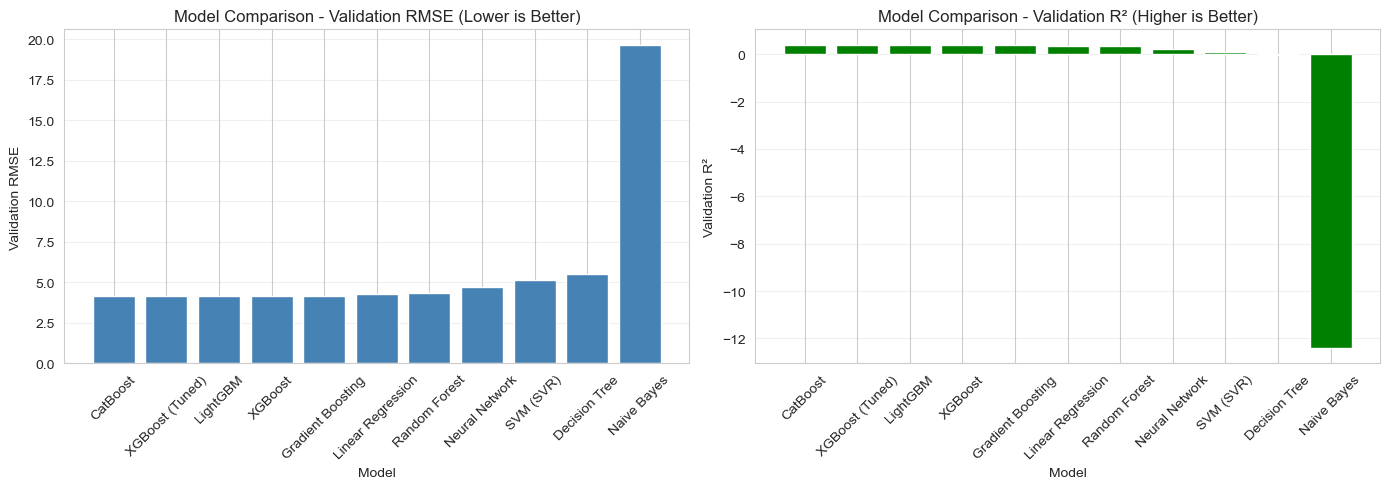

In [149]:
# ============================================
# MODEL COMPARISON
# ============================================

print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Build results dynamically, only including models that have been trained
models_data = []

# Helper function to safely get variable value
def get_var(var_name, default=None):
    try:
        return locals().get(var_name) or globals().get(var_name, default)
    except:
        return default

# Add models that are always available
models_data.append({
    'Model': 'Linear Regression',
    'Train_RMSE': train_rmse,
    'Val_RMSE': val_rmse,
    'Val_R2': val_r2
})

if 'train_rmse_dt' in locals() or 'train_rmse_dt' in globals():
    models_data.append({
        'Model': 'Decision Tree',
        'Train_RMSE': train_rmse_dt,
        'Val_RMSE': val_rmse_dt,
        'Val_R2': val_r2_dt
    })

if 'train_rmse_rf' in locals() or 'train_rmse_rf' in globals():
    models_data.append({
        'Model': 'Random Forest',
        'Train_RMSE': train_rmse_rf,
        'Val_RMSE': val_rmse_rf,
        'Val_R2': val_r2_rf
    })

if 'train_rmse_svr' in locals() or 'train_rmse_svr' in globals():
    models_data.append({
        'Model': 'SVM (SVR)',
        'Train_RMSE': train_rmse_svr,
        'Val_RMSE': val_rmse_svr,
        'Val_R2': val_r2_svr
    })

if 'train_rmse_gb' in locals() or 'train_rmse_gb' in globals():
    models_data.append({
        'Model': 'Gradient Boosting',
        'Train_RMSE': train_rmse_gb,
        'Val_RMSE': val_rmse_gb,
        'Val_R2': val_r2_gb
    })

if 'train_rmse_xgb' in locals() or 'train_rmse_xgb' in globals():
    models_data.append({
        'Model': 'XGBoost',
        'Train_RMSE': train_rmse_xgb,
        'Val_RMSE': val_rmse_xgb,
        'Val_R2': val_r2_xgb
    })

if 'val_rmse_best' in locals() or 'val_rmse_best' in globals():
    models_data.append({
        'Model': 'XGBoost (Tuned)',
        'Train_RMSE': train_rmse_xgb if 'train_rmse_xgb' in locals() or 'train_rmse_xgb' in globals() else None,
        'Val_RMSE': val_rmse_best,
        'Val_R2': val_r2_best
    })

# CatBoost
if 'train_rmse_cat' in locals() or 'train_rmse_cat' in globals():
    models_data.append({
        'Model': 'CatBoost',
        'Train_RMSE': train_rmse_cat,
        'Val_RMSE': val_rmse_cat,
        'Val_R2': val_r2_cat
    })

# LightGBM
if 'train_rmse_lgb' in locals() or 'train_rmse_lgb' in globals():
    models_data.append({
        'Model': 'LightGBM',
        'Train_RMSE': train_rmse_lgb,
        'Val_RMSE': val_rmse_lgb,
        'Val_R2': val_r2_lgb
    })

if 'train_rmse_nb' in locals() or 'train_rmse_nb' in globals():
    models_data.append({
        'Model': 'Naive Bayes',
        'Train_RMSE': train_rmse_nb,
        'Val_RMSE': val_rmse_nb,
        'Val_R2': val_r2_nb
    })

if 'train_rmse_nn' in locals() or 'train_rmse_nn' in globals():
    models_data.append({
        'Model': 'Neural Network',
        'Train_RMSE': train_rmse_nn,
        'Val_RMSE': val_rmse_nn,
        'Val_R2': val_r2_nn
    })

# Create DataFrame from collected models
results = pd.DataFrame(models_data)

results = results.sort_values('Val_RMSE')
print(results.to_string(index=False))

print(f"\n🏆 Best Model: {results.iloc[0]['Model']}")
print(f"   Validation RMSE: {results.iloc[0]['Val_RMSE']:.4f}")
print(f"   Validation R²: {results.iloc[0]['Val_R2']:.4f}")

# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
axes[0].bar(results['Model'], results['Val_RMSE'], color='steelblue')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Validation RMSE')
axes[0].set_title('Model Comparison - Validation RMSE (Lower is Better)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# R² comparison
axes[1].bar(results['Model'], results['Val_R2'], color='green')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Validation R²')
axes[1].set_title('Model Comparison - Validation R² (Higher is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [150]:
# ============================================
# MODEL PERFORMANCE SUMMARY TABLE
# ============================================

import pandas as pd

# Create results dataframe
# Build results dynamically, only including models that have been trained
models_data = []

# Add models that are always available
models_data.append({
    'Model': 'Linear Regression',
    'Train_RMSE': train_rmse,
    'Val_RMSE': val_rmse,
    'Val_R2': val_r2
})

if 'train_rmse_rf' in locals() or 'train_rmse_rf' in globals():
    models_data.append({
        'Model': 'Random Forest',
        'Train_RMSE': train_rmse_rf,
        'Val_RMSE': val_rmse_rf,
        'Val_R2': val_r2_rf
    })

if 'train_rmse_gb' in locals() or 'train_rmse_gb' in globals():
    models_data.append({
        'Model': 'Gradient Boosting',
        'Train_RMSE': train_rmse_gb,
        'Val_RMSE': val_rmse_gb,
        'Val_R2': val_r2_gb
    })

if 'train_rmse_xgb' in locals() or 'train_rmse_xgb' in globals():
    models_data.append({
        'Model': 'XGBoost',
        'Train_RMSE': train_rmse_xgb,
        'Val_RMSE': val_rmse_xgb,
        'Val_R2': val_r2_xgb
    })

if 'val_rmse_best' in locals() or 'val_rmse_best' in globals():
    models_data.append({
        'Model': 'XGBoost (Tuned)',
        'Train_RMSE': train_rmse_xgb if 'train_rmse_xgb' in locals() or 'train_rmse_xgb' in globals() else None,
        'Val_RMSE': val_rmse_best,
        'Val_R2': val_r2_best
    })

# CatBoost
if 'train_rmse_cat' in locals() or 'train_rmse_cat' in globals():
    models_data.append({
        'Model': 'CatBoost',
        'Train_RMSE': train_rmse_cat,
        'Val_RMSE': val_rmse_cat,
        'Val_R2': val_r2_cat
    })

# LightGBM
if 'train_rmse_lgb' in locals() or 'train_rmse_lgb' in globals():
    models_data.append({
        'Model': 'LightGBM',
        'Train_RMSE': train_rmse_lgb,
        'Val_RMSE': val_rmse_lgb,
        'Val_R2': val_r2_lgb
    })

if 'train_rmse_nn' in locals() or 'train_rmse_nn' in globals():
    models_data.append({
        'Model': 'Neural Network',
        'Train_RMSE': train_rmse_nn,
        'Val_RMSE': val_rmse_nn,
        'Val_R2': val_r2_nn
    })

# Create DataFrame from collected models
results = pd.DataFrame(models_data)

# Sort by validation RMSE (best first)
results = results.sort_values('Val_RMSE')

print("\nMODEL PERFORMANCE COMPARISON")
print("="*60)
print(results.to_string(index=False))
print("="*60)
print(f"\nBest Model: {results.iloc[0]['Model']} (Val RMSE: {results.iloc[0]['Val_RMSE']:.4f})")


MODEL PERFORMANCE COMPARISON
            Model  Train_RMSE  Val_RMSE   Val_R2
         CatBoost    4.100261  4.142771 0.402287
  XGBoost (Tuned)    3.994917  4.142832 0.402270
         LightGBM    4.015510  4.143050 0.402207
          XGBoost    3.994917  4.154496 0.398899
Gradient Boosting    4.056476  4.157302 0.398087
Linear Regression    4.296034  4.311911 0.352485
    Random Forest    2.482124  4.343567 0.342942
   Neural Network    3.804763  4.725966 0.222157

Best Model: CatBoost (Val RMSE: 4.1428)


## Hyperparameter Tuning on XGBoost

In [151]:
# ============================================
# HYPERPARAMETER TUNING - XGBOOST
# ============================================

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

print("\n" + "="*60)
print("HYPERPARAMETER TUNING - XGBOOST")
print("="*60)

# Define parameter grid
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Create model
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# Randomized search (faster than grid search)
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=3,       # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter search...")
random_search.fit(X_train, y_train)

print(f"\n✓ Best parameters found:")
print(random_search.best_params_)

# Train with best parameters
best_xgb = random_search.best_estimator_

# Predictions
y_val_pred_best = best_xgb.predict(X_val)
val_rmse_best = np.sqrt(mean_squared_error(y_val, y_val_pred_best))
val_r2_best = r2_score(y_val, y_val_pred_best)

print(f"\n{'='*60}")
print(f"TUNED XGBOOST RESULTS")
print(f"{'='*60}")
print(f"Validation RMSE: {val_rmse_best:.4f}")
print(f"Validation R²: {val_r2_best:.4f}")
print(f"Improvement: {val_rmse_xgb - val_rmse_best:.4f}")


HYPERPARAMETER TUNING - XGBOOST
Starting hyperparameter search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits



✓ Best parameters found:
{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}

TUNED XGBOOST RESULTS
Validation RMSE: 4.1427
Validation R²: 0.4023
Improvement: 0.0118


## Ensemble Models

Combine your best models for potentially better results:

In [152]:
# ============================================
# ADVANCED ENSEMBLE USING MULTIPLE MODELS
# ============================================

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\n" + "="*60)
print("ADVANCED ENSEMBLE - TOP MODELS")
print("="*60)

# Ensure y_val is a 1D array
y_val_array = np.asarray(y_val).ravel()

# 1) Map model names (as in `results['Model']`) to their validation predictions
#    Adjust variable names if yours are different.
# Use best_xgb for both XGBoost entries since it's the tuned version and always available
model_preds = {}
try:
    model_preds['Linear Regression'] = np.asarray(lr_model.predict(X_val)).ravel()
except:
    print("Warning: Linear Regression model not available")
    
try:
    model_preds['Random Forest'] = np.asarray(rf_model.predict(X_val)).ravel()
except:
    print("Warning: Random Forest model not available")
    
try:
    model_preds['Gradient Boosting'] = np.asarray(gb_model.predict(X_val)).ravel()
except:
    print("Warning: Gradient Boosting model not available")

# XGBoost: use best_xgb (tuned version) for both entries
try:
    if 'best_xgb' in locals() and best_xgb is not None:
        model_preds['XGBoost'] = np.asarray(best_xgb.predict(X_val)).ravel()
        model_preds['XGBoost (Tuned)'] = np.asarray(best_xgb.predict(X_val)).ravel()
    elif 'xgb_model' in locals() and xgb_model is not None:
        model_preds['XGBoost'] = np.asarray(xgb_model.predict(X_val)).ravel()
        model_preds['XGBoost (Tuned)'] = np.asarray(xgb_model.predict(X_val)).ravel()
except Exception as e:
    print(f"Warning: XGBoost model not available: {e}")

# CatBoost and LightGBM
try:
    if 'cat_model' in locals() and cat_model is not None:
        model_preds['CatBoost'] = np.asarray(cat_model.predict(X_val)).ravel()
except Exception as e:
    print(f"Warning: CatBoost model not available: {e}")

try:
    if 'lgb_model' in locals() and lgb_model is not None:
        model_preds['LightGBM'] = np.asarray(lgb_model.predict(X_val)).ravel()
except Exception as e:
    print(f"Warning: LightGBM model not available: {e}")

# Neural Network
try:
    model_preds['Neural Network'] = np.asarray(nn_model.predict(X_val)).ravel()
except Exception as e:
    print(f"Warning: Neural Network model not available: {e}")

# Ridge, Lasso, ElasticNet - REMOVED from ensemble (poor performance: RMSE 4.31 vs best 4.14)
# These models perform worse than best models, so excluding from ensemble
# try:
#     if 'ridge_model' in locals() or 'ridge_model' in globals():
#         model_preds['Ridge Regression'] = np.asarray(ridge_model.predict(X_val)).ravel()
# except Exception as e:
#     print(f"Warning: Ridge Regression not available: {e}")
# 
# try:
#     if 'lasso_model' in locals() or 'lasso_model' in globals():
#         model_preds['Lasso Regression'] = np.asarray(lasso_model.predict(X_val)).ravel()
# except Exception as e:
#     print(f"Warning: Lasso Regression not available: {e}")
# 
# try:
#     if 'elastic_model' in locals() or 'elastic_model' in globals():
#         model_preds['ElasticNet'] = np.asarray(elastic_model.predict(X_val)).ravel()
# except Exception as e:
#     print(f"Warning: ElasticNet not available: {e}")

# Stacking Ensemble
try:
    if 'stacking_model' in locals() or 'stacking_model' in globals():
        model_preds['Stacking Ensemble'] = np.asarray(stacking_model.predict(X_val)).ravel()
except Exception as e:
    print(f"Warning: Stacking Ensemble not available: {e}")

print(f"\n✓ Available models for ensemble: {list(model_preds.keys())}")
print(f"  Total models: {len(model_preds)}")

# 2) Decide which models to ensemble: take the top 3 by Val_RMSE from your `results`
top_k = 3
top_models_candidates = list(results.sort_values('Val_RMSE')['Model'].head(top_k))

# Filter to only include models that are actually available in model_preds
top_models = [m for m in top_models_candidates if m in model_preds]

# If we filtered some out, print a warning
if len(top_models) < len(top_models_candidates):
    missing = [m for m in top_models_candidates if m not in model_preds]
    print(f"\n⚠️  Warning: Some top models are not available: {missing}")
    print(f"   Using available top models instead.")

# Make sure we have at least 2 models
if len(top_models) < 2:
    print(f"\n⚠️  Error: Need at least 2 models for ensemble, but only {len(top_models)} available.")
    print(f"   Available models: {list(model_preds.keys())}")
    raise ValueError("Not enough models available for ensemble")

# Update top_k to match available models
top_k = len(top_models)
print(f"\nUsing top {top_k} available models in ensemble:", top_models)

# Build prediction matrix for those models: shape (n_samples, top_k)
pred_matrix = np.column_stack([model_preds[m] for m in top_models])

# 3) Grid search over weights that sum to 1 (step = 0.1)
weight_step = 0.1
candidate_weights = []

if top_k == 2:
    # For 2 models: w1 in [0,1], w2 = 1 - w1
    for w1 in np.arange(0, 1 + weight_step, weight_step):
        w2 = 1.0 - w1
        candidate_weights.append((w1, w2))
elif top_k == 3:
    # For 3 models: w1 + w2 + w3 = 1
    for w1 in np.arange(0, 1 + weight_step, weight_step):
        for w2 in np.arange(0, 1 - w1 + weight_step, weight_step):
            w3 = 1.0 - w1 - w2
            if w3 < -1e-9:
                continue
            candidate_weights.append((w1, w2, max(0.0, w3)))
else:
    raise ValueError("This block currently supports top_k=2 or 3.")

best_rmse = float('inf')
best_r2 = None
best_weights = None

print("\nTrying weight combinations (summing to 1):")
print("-" * 50)

for w in candidate_weights:
    w = np.array(w)

    # Weighted ensemble prediction
    ensemble_preds = pred_matrix @ w

    rmse = np.sqrt(mean_squared_error(y_val_array, ensemble_preds))
    r2   = r2_score(y_val_array, ensemble_preds)

    print(f"Weights {dict(zip(top_models, [round(x, 2) for x in w]))} "
          f"→ RMSE: {rmse:.4f}, R²: {r2:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_weights = w

print("-" * 50)

print("\n✓ Best Ensemble Found!")
print("  Models & Weights:")
for name, w in zip(top_models, best_weights):
    print(f"    {name}: {w:.2f}")

print(f"\n  Ensemble Val RMSE: {best_rmse:.4f}")
print(f"  Ensemble Val R²:   {best_r2:.4f}")

# 4) Compare against individual models (using `results`)
print("\nComparison vs individual models (from results table):")
print(results[['Model', 'Val_RMSE', 'Val_R2']].to_string(index=False))

# 5) Decide whether to use ensemble
best_single_idx = results['Val_RMSE'].idxmin()
best_single_model = results.loc[best_single_idx, 'Model']
best_single_rmse = results.loc[best_single_idx, 'Val_RMSE']

if best_rmse < best_single_rmse:
    print(f"\n🏆 Ensemble beats best single model ({best_single_model}) "
          f"by {best_single_rmse - best_rmse:.4f} RMSE!")
    use_ensemble = True
else:
    print(f"\n✗ Ensemble does NOT beat best single model "
          f"({best_single_model}). Stick with that one.")
    use_ensemble = False

# 6) Store best ensemble predictions for validation
best_ensemble_preds = None
best_ensemble_models = top_models
best_ensemble_weights = best_weights

if use_ensemble:
    best_ensemble_preds = pred_matrix @ best_weights



ADVANCED ENSEMBLE - TOP MODELS


expected BCS_Efficiency, Humidity_Deviation, Temp_Comfort_Score, Humidity_Comfort_Score, Activity_Balance, Temp_Deviation, Environmental_Stress, Prime_Production, Health_Score in input data

✓ Available models for ensemble: ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'XGBoost (Tuned)', 'CatBoost', 'LightGBM', 'Neural Network']
  Total models: 8

Using top 3 available models in ensemble: ['CatBoost', 'XGBoost (Tuned)', 'LightGBM']

Trying weight combinations (summing to 1):
--------------------------------------------------
Weights {'CatBoost': np.float64(0.0), 'XGBoost (Tuned)': np.float64(0.0), 'LightGBM': np.float64(1.0)} → RMSE: 4.1430, R²: 0.4022
Weights {'CatBoost': np.float64(0.0), 'XGBoost (Tuned)': np.float64(0.1), 'LightGBM': np.float64(0.9)} → RMSE: 4.1416, R²: 0.4026
Weights {'CatBoost': np.float64(0.0), 'XGBoost (Tuned)': np.float64(0.2), 'LightGBM': np.float64(0.8)} → RMSE: 4.1405, R²: 0.4029
Weights {'CatBoost': np.float64(0.0), 'XGBoost (Tuned)

## Stacking Ensemble (Meta-Learner)

Advanced ensemble method using a meta-learner to optimally combine base models.


In [153]:
# ============================================
# STACKING ENSEMBLE (META-LEARNER)
# ============================================

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

print("\n" + "="*60)
print("STACKING ENSEMBLE")
print("="*60)

# Prepare base models (only include models that exist)
base_models_list = []

# Check which models are available
if 'best_xgb' in locals() or 'best_xgb' in globals():
    base_models_list.append(('xgb_tuned', best_xgb))

if 'cat_model' in locals() or 'cat_model' in globals():
    # Use best_cat if available, otherwise cat_model
    if 'best_cat' in locals() or 'best_cat' in globals():
        base_models_list.append(('cat', best_cat))
    else:
        base_models_list.append(('cat', cat_model))

if 'lgb_model' in locals() or 'lgb_model' in globals():
    # Use best_lgb if available, otherwise lgb_model
    if 'best_lgb' in locals() or 'best_lgb' in globals():
        base_models_list.append(('lgb', best_lgb))
    else:
        base_models_list.append(('lgb', lgb_model))

if 'gb_model' in locals() or 'gb_model' in globals():
    base_models_list.append(('gb', gb_model))

if 'rf_model' in locals() or 'rf_model' in globals():
    base_models_list.append(('rf', rf_model))

print(f"Using {len(base_models_list)} base models for stacking:")
for name, _ in base_models_list:
    print(f"  - {name}")

if len(base_models_list) < 2:
    print("\n⚠️  Warning: Need at least 2 models for stacking. Skipping...")
else:
    # Create stacking ensemble with Ridge as meta-learner
    stacking_model = StackingRegressor(
        estimators=base_models_list,
        final_estimator=Ridge(alpha=10),  # Regularized meta-learner
        cv=5,  # 5-fold CV for meta-features
        n_jobs=-1,
        verbose=0
    )
    
    print("\nTraining Stacking Ensemble...")
    print("(This may take several minutes...)")
    
    stacking_model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred_stacking = stacking_model.predict(X_train)
    y_val_pred_stacking = stacking_model.predict(X_val)
    
    # Calculate RMSE
    train_rmse_stacking = np.sqrt(mean_squared_error(y_train, y_train_pred_stacking))
    val_rmse_stacking = np.sqrt(mean_squared_error(y_val, y_val_pred_stacking))
    val_r2_stacking = r2_score(y_val, y_val_pred_stacking)
    
    print(f"\n{'='*60}")
    print(f"STACKING ENSEMBLE RESULTS")
    print(f"{'='*60}")
    print(f"Training RMSE: {train_rmse_stacking:.4f}")
    print(f"Validation RMSE: {val_rmse_stacking:.4f}")
    print(f"Validation R²: {val_r2_stacking:.4f}")
    
    # Compare with best single model
    if 'val_rmse_best' in locals() or 'val_rmse_best' in globals():
        improvement = val_rmse_best - val_rmse_stacking
        if improvement > 0:
            print(f"\n✓ Stacking beats best single model by {improvement:.4f} RMSE!")
        else:
            print(f"\nStacking RMSE: {val_rmse_stacking:.4f} vs Best Single: {val_rmse_best:.4f}")



STACKING ENSEMBLE
Using 5 base models for stacking:
  - xgb_tuned
  - cat
  - lgb
  - gb
  - rf

Training Stacking Ensemble...
(This may take several minutes...)


Exception ignored in: <function ResourceTracker.__del__ at 0x106a29bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102885bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107649bc0>
Traceback (most recent call last


STACKING ENSEMBLE RESULTS
Training RMSE: 4.1791
Validation RMSE: 4.1346
Validation R²: 0.4046

✓ Stacking beats best single model by 0.0080 RMSE!


In [154]:
[x for x in dir() if x.startswith("X")]

['X',
 'X_for_selection',
 'X_scaled',
 'X_test_model',
 'X_test_scaled',
 'X_train',
 'X_train_svr',
 'X_val',
 'X_var_filtered']

In [155]:
# ============================================
# BUILD TEST FEATURES, PREDICT, CREATE KAGGLE CSV
# ============================================

import pandas as pd
import numpy as np

print("\n" + "="*60)
print("GENERATING KAGGLE SUBMISSION")
print("="*60)

# Calculate median feed efficiency from training data before processing test data
# This assumes 'Feed_Efficiency' is already created and cleaned in train_data
train_median_feed_efficiency = train_data['Feed_Efficiency'].median()

# 1. Load test data
test_df = pd.read_csv('cattle_data_test.csv')

# IMPORTANT: Capture Cattle_IDs from the original test_df BEFORE any potential row dropping
test_ids = test_df["Cattle_ID"]

# Drop target variable if it exists in test_df (shouldn't for actual test set)
if 'Milk_Yield_L' in test_df.columns:
    test_df = test_df.drop(columns=['Milk_Yield_L'])

test_processed = test_df.copy() # Use a new variable name for clarity

# --- 2) Apply SAME feature engineering as training ---

# 1. Age-Weight interaction (older, heavier cows might behave differently)
test_processed['Age_Weight_Interaction'] = test_processed['Age_Months'] * test_processed['Weight_kg']

# 2. Feed efficiency (feed per kg of body weight)
test_processed['Feed_Efficiency'] = test_processed['Feed_Quantity_kg'] / test_processed['Weight_kg']

# 3. Water efficiency (water per kg of body weight)
test_processed['Water_Efficiency'] = test_processed['Water_Intake_L'] / test_processed['Weight_kg']

# 4. Activity level (walking + grazing + rumination)
test_processed['Total_Activity_hrs'] = (test_processed['Walking_Distance_km'] +
                                     test_processed['Grazing_Duration_hrs'] +
                                     test_processed['Rumination_Time_hrs'])

# 5. Previous week difference from mean (is this cow producing above/below average?)
# Use the mean from the training data for consistency
train_prev_week_mean = train_data['Previous_Week_Avg_Yield'].mean()
test_processed['Prev_Week_vs_Mean'] = test_processed['Previous_Week_Avg_Yield'] - train_prev_week_mean

# 6. Days in milk squared (non-linear relationship)
test_processed['Days_in_Milk_Squared'] = test_processed['Days_in_Milk'] ** 2

# 7. Age categories (young, prime, old)
test_processed['Age_Category'] = pd.cut(test_processed['Age_Months'],
                                     bins=[0, 36, 84, 200],
                                     labels=['Young', 'Prime', 'Old'])

# --- Advanced Domain-Specific Features ---
# 8. Lactation Efficiency
test_processed['Lactation_Efficiency'] = test_processed['Previous_Week_Avg_Yield'] / (test_processed['Days_in_Milk'] + 1)

# 9. Feed Quality Score
test_processed['Feed_Quality_Score'] = test_processed['Feed_Quantity_kg'] * test_processed['Feeding_Frequency']

# 10. Activity Balance
test_processed['Activity_Balance'] = (test_processed['Walking_Distance_km'] + 
                                     test_processed['Grazing_Duration_hrs']) / (test_processed['Resting_Hours'] + 1)

# 11. Health Score
vaccine_count = (test_processed['FMD_Vaccine'] + test_processed['Brucellosis_Vaccine'] + 
                 test_processed['HS_Vaccine'] + test_processed['BQ_Vaccine'] + 
                 test_processed['Anthrax_Vaccine'] + test_processed['IBR_Vaccine'] + 
                 test_processed['BVD_Vaccine'] + test_processed['Rabies_Vaccine'])
test_processed['Health_Score'] = vaccine_count + test_processed['Body_Condition_Score']

# 12. Environmental Stress
temp_deviation = test_processed['Ambient_Temperature_C'] - 20
humidity_deviation = test_processed['Humidity_percent'] - 50
test_processed['Environmental_Stress'] = (temp_deviation**2 + humidity_deviation**2) / 100

# 13. Production Potential
test_processed['Production_Potential'] = (test_processed['Age_Months'] / 100) * (test_processed['Weight_kg'] / 100) * test_processed['Parity']

# 14. Feed-to-Water Ratio
test_processed['Feed_Water_Ratio'] = test_processed['Feed_Quantity_kg'] / (test_processed['Water_Intake_L'] + 1)

# 15. Milking Efficiency
test_processed['Milking_Efficiency'] = test_processed['Previous_Week_Avg_Yield'] / (test_processed['Milking_Interval_hrs'] + 1)

# 16. Prime Production Indicator
test_processed['Prime_Production'] = ((test_processed['Age_Months'] >= 36) & 
                                      (test_processed['Age_Months'] <= 84)).astype(int) * test_processed['Parity']

# 17. Body Condition Efficiency
test_processed['BCS_Efficiency'] = test_processed['Body_Condition_Score'] * test_processed['Weight_kg'] / 1000

# 18. Age normalization
test_processed['Age_Years'] = test_processed['Age_Months'] / 12

# 19. Weight normalization
test_processed['Weight_Normalized'] = test_processed['Weight_kg'] / 100

# 20. Temperature and Humidity comfort scores
test_processed['Temp_Deviation'] = abs(test_processed['Ambient_Temperature_C'] - 20)
test_processed['Temp_Comfort_Score'] = 1 / (1 + test_processed['Temp_Deviation'])

test_processed['Humidity_Deviation'] = abs(test_processed['Humidity_percent'] - 50)
test_processed['Humidity_Comfort_Score'] = 1 / (1 + test_processed['Humidity_Deviation'])

# Handle infinite values
test_processed.replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 3) Handle Missing Values (using median from training data) ---
print("Handling missing values in test data...")
# For numerical columns with missing values, use median from training data
train_median_feed_kg = train_data['Feed_Quantity_kg'].median()
train_median_feed_lb = train_data['Feed_Quantity_lb'].median()
train_median_housing_score = train_data['Housing_Score'].median()

test_processed['Feed_Quantity_kg'].fillna(train_median_feed_kg, inplace=True)
test_processed['Feed_Quantity_lb'].fillna(train_median_feed_lb, inplace=True)
test_processed['Housing_Score'].fillna(train_median_housing_score, inplace=True)

# Impute engineered features with infinite values
engineered_features_to_impute = [
    'Feed_Efficiency', 'Water_Efficiency', 'Lactation_Efficiency',
    'Activity_Balance', 'Feed_Water_Ratio', 'Milking_Efficiency',
    'Temp_Comfort_Score', 'Humidity_Comfort_Score'
]

# Store medians from training data for imputation
train_medians = {}
for feat in engineered_features_to_impute:
    if feat in train_data.columns:
        train_medians[feat] = train_data[feat].median()

# Replace infinite values and impute
for feat in engineered_features_to_impute:
    if feat in test_processed.columns:
        test_processed[feat].replace([np.inf, -np.inf], np.nan, inplace=True)
        if feat in train_medians:
            test_processed[feat].fillna(train_medians[feat], inplace=True)
        else:
            test_processed[feat].fillna(test_processed[feat].median(), inplace=True)

# Removed: test_processed.dropna(inplace=True) to avoid dropping rows

# Verify no more missing values after imputation (should be none)
print("\nMissing values in test_processed after imputation (should be empty if all handled):")
print(test_processed.isnull().sum()[test_processed.isnull().sum() > 0])

# --- 4) Apply SAME encoding as training ---

# Label encode Age_Category and Date
if 'Age_Category' in test_processed.columns:
    # Use fillna('Unknown') or another strategy if NaNs are present from pd.cut (e.g., due to Age_Months NaNs)
    test_processed['Age_Category_Encoded'] = label_encoders['Age_Category'].transform(test_processed['Age_Category'].astype(str))
else:
    print("Warning: 'Age_Category' column not found in test_processed for encoding.")

if 'Date' in test_processed.columns:
    test_processed['Date_Encoded'] = label_encoders['Date'].transform(test_processed['Date'].astype(str))
else:
    print("Warning: 'Date' column not found in test_processed for encoding.")

# One-hot encode nominal categorical features
test_encoded = pd.get_dummies(test_processed,
                                columns=['Breed', 'Climate_Zone', 'Management_System',
                                        'Lactation_Stage', 'Feed_Type'],
                                prefix=['Breed', 'Climate', 'Mgmt', 'Lactation', 'Feed'],
                                drop_first=True) # Needs to match training

# Identify columns to drop before final alignment (original columns replaced by encoded versions or IDs)
cols_to_drop_before_reindex = [
    'Cattle_ID', 'Farm_ID', 'Date', 'Age_Category', # Original identifier/categorical columns
    'Breed', 'Climate_Zone', 'Management_System', 'Lactation_Stage', 'Feed_Type' # Original categoricals that were OHE
]
X_test_model = test_encoded.drop(columns=[col for col in cols_to_drop_before_reindex if col in test_encoded.columns], errors='ignore')

# VERY IMPORTANT: align columns with training features (`feature_columns` from training `X`)
# This ensures test data has the exact same columns in the same order as training data.
# Any columns in feature_columns not in X_test_model will be added with 0.
# Any columns in X_test_model not in feature_columns will be dropped.
X_test_model = X_test_model.reindex(columns=feature_columns, fill_value=0)

# 5. Scale using SAME scaler object as training
X_test_scaled  = scaler.transform(X_test_model)

# 6. Map model names (as in results['Model']) to actual model objects
# Note: Include both 'XGBoost' and 'XGBoost (Tuned)' since both may appear in results
model_objects = {
    "Linear Regression": lr_model,
    "Random Forest":     rf_model,
    "Gradient Boosting": gb_model,
    "XGBoost":           best_xgb,   # tuned XGBoost
    "XGBoost (Tuned)":   best_xgb,   # same as XGBoost (best_xgb is the tuned version)
}

# Add CatBoost models (use best if available, otherwise default)
if 'best_cat' in locals() or 'best_cat' in globals():
    model_objects["CatBoost"] = best_cat
    model_objects["CatBoost (Tuned)"] = best_cat
elif 'cat_model' in locals() or 'cat_model' in globals():
    model_objects["CatBoost"] = cat_model

# Add LightGBM models (use best if available, otherwise default)
if 'best_lgb' in locals() or 'best_lgb' in globals():
    model_objects["LightGBM"] = best_lgb
    model_objects["LightGBM (Tuned)"] = best_lgb
elif 'lgb_model' in locals() or 'lgb_model' in globals():
    model_objects["LightGBM"] = lgb_model

# Add regularized linear models - REMOVED (poor performance: RMSE 4.31 vs best 4.14)
# These models perform worse than best models, so excluding from test predictions
# if 'ridge_model' in locals() or 'ridge_model' in globals():
#     model_objects["Ridge Regression"] = ridge_model
# if 'lasso_model' in locals() or 'lasso_model' in globals():
#     model_objects["Lasso Regression"] = lasso_model
# if 'elastic_model' in locals() or 'elastic_model' in globals():
#     model_objects["ElasticNet"] = elastic_model

# Add stacking ensemble
if 'stacking_model' in locals() or 'stacking_model' in globals():
    model_objects["Stacking Ensemble"] = stacking_model

# Add Neural Network
if 'nn_model' in locals() or 'nn_model' in globals():
    model_objects["Neural Network"] = nn_model

print(f"\nAvailable models for predictions: {list(model_objects.keys())}")

# 7. Get predictions from ensemble or best single model
if use_ensemble:
    print("\nUsing ENSEMBLE for test predictions.")
    
    # Filter best_ensemble_models to only include models that exist in model_objects
    available_ensemble_models = [name for name in best_ensemble_models if name in model_objects]
    
    if len(available_ensemble_models) < len(best_ensemble_models):
        missing = [name for name in best_ensemble_models if name not in model_objects]
        print(f"⚠️  Warning: Some ensemble models not available: {missing}")
        print(f"   Using available models: {available_ensemble_models}")
        
        # If we have fewer models, we need to adjust weights
        if len(available_ensemble_models) >= 2:
            # Normalize weights to sum to 1 for available models
            available_indices = [i for i, name in enumerate(best_ensemble_models) if name in model_objects]
            best_ensemble_weights = np.array([best_ensemble_weights[i] for i in available_indices])
            best_ensemble_weights = best_ensemble_weights / best_ensemble_weights.sum()
            best_ensemble_models = available_ensemble_models
        else:
            print("⚠️  Error: Not enough models available. Falling back to best single model.")
            use_ensemble = False
    
    if use_ensemble:
        # prediction matrix: shape (n_samples, n_models_in_ensemble)
        test_pred_matrix = np.column_stack([
            np.asarray(model_objects[name].predict(X_test_scaled)).ravel()
            for name in best_ensemble_models
        ])
        test_preds = test_pred_matrix @ best_ensemble_weights
    else:
        # Fall back to best single model
        best_single_model = results.sort_values('Val_RMSE')['Model'].iloc[0]
        print(f"\nUsing BEST SINGLE MODEL instead: {best_single_model}")
        if best_single_model in model_objects:
            best_model_obj = model_objects[best_single_model]
            test_preds = np.asarray(best_model_obj.predict(X_test_scaled)).ravel()
        else:
            raise KeyError(f"Model '{best_single_model}' not found in model_objects. Available: {list(model_objects.keys())}")
else:
    print("\nUsing BEST SINGLE MODEL for test predictions.")
    print(f"Best single model: {best_single_model}")
    if best_single_model in model_objects:
        best_model_obj = model_objects[best_single_model]
        test_preds = np.asarray(best_model_obj.predict(X_test_scaled)).ravel()
    else:
        raise KeyError(f"Model '{best_single_model}' not found in model_objects. Available: {list(model_objects.keys())}")

# Optional: clamp negatives if milk yield can't be < 0
test_preds = np.clip(test_preds, 0, None)

# 8. Build submission DataFrame matching sample_submission
submission = pd.DataFrame({
    "Cattle_ID": test_ids,
    "Milk_Yield_L": test_preds
})

# 9. Save to CSV
submission_filename = "submission.csv"
submission.to_csv(submission_filename, index=False)

print(f"\n✓ Submission file saved as: {submission_filename}")
print("\nPreview:")
print(submission.head())


GENERATING KAGGLE SUBMISSION
Handling missing values in test data...

Missing values in test_processed after imputation (should be empty if all handled):
Feed_Quality_Score    2015
dtype: int64


/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_722/396335213.py:119: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_processed['Feed_Quantity_kg'].fillna(train_median_feed_kg, inplace=True)
/var/folders/4_/shm11v215kvb1mrml9h4jlx40000gn/T/ipykernel_722/396335213.py:120: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


Available models for predictions: ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'XGBoost (Tuned)', 'CatBoost', 'CatBoost (Tuned)', 'LightGBM', 'LightGBM (Tuned)', 'Stacking Ensemble', 'Neural Network']

Using ENSEMBLE for test predictions.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



✓ Submission file saved as: submission.csv

Preview:
   Cattle_ID  Milk_Yield_L
0          1     19.046682
1          2     10.538339
2          3     24.299257
3          4     14.847247
4          5     18.351190


In [ ]:
len(submission)


40000

Exception ignored in: <function ResourceTracker.__del__ at 0x106941bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104c05bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
